<a href="https://colab.research.google.com/github/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/blob/main/Code%20-%20Approach_2%20of%20CrimeAnalytics%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **5.0 Loading Libraries and Major Crime Indicator Dataset from TPS**

In [ ]:
                                                                                  # Import necessary libraries
import itertools
import os
import pandas as pd
import time
import kagglehub
import warnings
from IPython.display import display, HTML
from kagglehub import KaggleDatasetAdapter
from google.colab import files

os.system('pip install openpyxl -qqq')                                            # Install openpyxl for Excel support
os.system('pip install tabulate -qqq')                                            # Install tabulate for cleaner table output

warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings

file_path = "major-crime-indicators.csv"                                          # Set the file path to the filename with extension

crime_df = kagglehub.load_dataset(                                                # Load the latest version of the dataset from Kaggle
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "mohammadbadi/crimes-in-toronto",                                             # Updated dataset handle
    file_path,
)

def format_message(message):                                                      # Function to format HTML messages
    return f"""
<div style="font-size: 18px; color: #333; font-weight: bold; padding: 10px;">
    {message}
</div>
"""

load_message = format_message(                                                    # Display HTML formatted message confirming that the dataset is loaded
    "Dataset <span style='color: blue;'>major-crime-indicators.csv</span> by <span style='color: slategray;'>Mohammad Badi</span> from Kaggle website is <span style='color: green;'>Successfully</span> loaded!"
)
display(HTML(load_message))

crime_df.to_csv("major-crime-indicators.csv", index=False)                        # Save the loaded dataset as a CSV file

save_message = format_message(                                                    # Display HTML formatted message confirming that the dataset is saved
    "Dataset saved in <span style='color: blue;'>current workspace</span> <span style='color: green;'>Successfully!</span>"
)
display(HTML(save_message))

major_crime_df = crime_df                                                         # Reusing the dataframe loaded earlier
def save_data(data_df, filename_base):
    csv_filename = f"{filename_base}.csv"                                         # Save as CSV
    data_df.to_csv(csv_filename, index=False)
    csv_msg = format_message(f"Data saved as CSV: <span style='color: blue;'>{csv_filename}</span>")
    display(HTML(csv_msg))
    excel_filename = f"{filename_base}.xlsx"                                      # Save as Excel
    data_df.to_excel(excel_filename, index=False, engine='openpyxl')
    excel_msg = format_message(f"Data saved as Excel: <span style='color: blue;'>{excel_filename}</span>")
    display(HTML(excel_msg))

save_data(major_crime_df, "Checking_Load_Time")                                   # Save the dataset as both CSV and Excel with name 'Checking_Load_Time'

def measure_read_time(file_path, file_type):                                      # Function to measure file reading time
    start_time = time.time()
    if file_type == "csv":
        pd.read_csv(file_path)
    elif file_type == "excel":
        pd.read_excel(file_path)
    end_time = time.time()
    return end_time - start_time

csv_time = measure_read_time('Checking_Load_Time.csv', "csv")                     # Measure read times
excel_time = measure_read_time('Checking_Load_Time.xlsx', "excel")

csv_time_color = "green" if csv_time < excel_time else "red"                      # Determine color coding for time messages
excel_time_color = "green" if excel_time < csv_time else "red"

csv_time_message = format_message(                                                # Display HTML formatted time messages
    f"Time taken to read <span style='color: blue;'>Checking_Load_Time CSV file</span>: <span style='color: {csv_time_color};'>{csv_time:.2f} seconds</span>"
)

excel_time_message = format_message(
    f"Time taken to read <span style='color: blue;'>Checking_Load_Time Excel file</span>: <span style='color: {excel_time_color};'>{excel_time:.2f} seconds</span>"
)

display(HTML(csv_time_message))                                                   # Display the time messages
display(HTML(excel_time_message))

if csv_time < excel_time:                                                         # Determine the recommendation based on time
    speed_factor = excel_time / csv_time
    recommendation = (
        f"Recommendation: Load the data from <span style='color: green;'>CSV</span> as it is approximately "
        f"<span style='color: green;'>{speed_factor:.2f} times faster</span> than loading from Excel."
    )
else:
    speed_factor = csv_time / excel_time
    recommendation = (
        f"Recommendation: Load the data from <span style='color: green;'>Excel</span> as it is approximately "
        f"<span style='color: green;'>{speed_factor:.2f} times faster</span> than loading from CSV."
    )

recommendation_message = format_message(recommendation)
display(HTML(recommendation_message))

completion_message = format_message("Dataset has been analyzed, and recommendation has been provided!")
display(HTML(completion_message))


### **5.1 Learning Application Domain: Summary Table**

In [ ]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import os
import contextlib
from google.colab import files
from IPython.display import display, HTML
from kagglehub import KaggleDatasetAdapter

print("\n\n")
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore future warnings

file_path = "major-crime-indicators.csv"                                          # File path for the dataset

with open(os.devnull, 'w') as fnull:                                              # Load the latest version using the correct dataset handle while suppressing the download output
    with contextlib.redirect_stdout(fnull):
        df = kagglehub.load_dataset(
            KaggleDatasetAdapter.PANDAS,
            "mohammadbadi/crimes-in-toronto",                                     # Dataset handle on Kaggle
            file_path,
        )

def count_leading_trailing_spaces(column):                                        # Function to check leading/trailing spaces, ensuring the column is treated as a string
    column = column.astype(str)
    return column.str.startswith(' ').sum(), column.str.endswith(' ').sum()

def prepare_summary_table(df):                                                    # Function to prepare the summary table with only Null values check and calculate % of Null
    unique_values = df.nunique()                                                  # Count total, unique, and Null values for each column
    total_values = df.count() + df.isnull().sum()                                 # Total includes NaN and Null
    null_counts = df.isnull().sum()

    null_percentages = (null_counts / total_values) * 100                         # Calculate the percentage of Null values compared to total values

    leading_spaces, trailing_spaces = zip(*[count_leading_trailing_spaces(df[col]) for col in df.columns]) # Initialize column-based space checks

    summary_table = pd.DataFrame({                                                # Create a summary table with the calculated values
        "Column": df.columns,
        "Data Type": df.dtypes,
        "Total Values": total_values,
        "Unique Values": unique_values,
        "Null Values": null_counts,
        "Null %": null_percentages.round(1),
        "Leading Spaces": leading_spaces,
        "Trailing Spaces": trailing_spaces
    })

    return summary_table, null_counts, null_percentages

def generate_summary_html(summary_table):                                        # Function to generate HTML for the summary table
    summary_table_html = """
    <style>
        table {
            border-collapse: collapse;
            width: 100%;
            font-family: Arial, sans-serif;
        }
        table th, table td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }
        table th {
            background-color: #4CAF50;
            color: white;
            font-size: 1.1em;
        }
        table tr:nth-child(even) {background-color: #f2f2f2;}
        table tr:hover {background-color: #ddd;}
    </style>
    <table>
        <tr>
            <th>Column</th>
            <th>Data Type</th>
            <th>Total Values</th>
            <th>Unique Values</th>
            <th>Null Values</th>
            <th>Null %</th>
            <th>Leading Spaces</th>
            <th>Trailing Spaces</th>
        </tr>
    """

    for _, row in summary_table.iterrows():
        null_color = "red" if row['Null Values'] > 0 else "green"
        leading_color = "red" if row['Leading Spaces'] > 0 else "green"
        trailing_color = "red" if row['Trailing Spaces'] > 0 else "green"

        summary_table_html += f"""
        <tr>
            <td>{row['Column']}</td>
            <td>{row['Data Type']}</td>
            <td>{row['Total Values']}</td>
            <td>{row['Unique Values']}</td>
            <td style='color:{null_color};'>{row['Null Values']}</td>
            <td>{row['Null %']}</td>
            <td style='color:{leading_color};'>{row['Leading Spaces']}</td>
            <td style='color:{trailing_color};'>{row['Trailing Spaces']}</td>
        </tr>
        """
    summary_table_html += "</table>"
    return summary_table_html

def plot_missing_percentage(df, dataset_name):                                    # Function to plot missing percentage visualization
    missing_percentage = df.isnull().mean() * 100                                 # Calculate the missing percentage for each column
    missing_percentage = missing_percentage[missing_percentage > 0]               # show only columns with missing values

    if missing_percentage.empty:                                                  # Check if there's any column with missing data
        print(f"No missing data in {dataset_name}. Skipping missing percentage plot.")
        return ""

    plt.figure(figsize=(10, 6))                                                  # Plotting the bar chart for missing percentages
    missing_percentage.sort_values().plot(kind='barh', color='skyblue', edgecolor='grey')
    plt.title(f'Missing Data Percentage - {dataset_name}', fontsize=16)
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    missing_plot_path = f'/content/5.1 Original Data Missing PercentPlot.png'     # Path to save the plot
    plt.savefig(missing_plot_path)
    plt.close()                                                                   # Close the plot to avoid displaying it again

    return missing_plot_path

def get_suggestions(null_counts):                                                 # Function to generate suggestions based on Null values
    suggestions = []

    no_null_columns = null_counts[null_counts == 0].index.tolist()                # Handle columns with no Null values
    if no_null_columns:
        suggestions.append(f"<div style='color:green;'><strong>Columns {', '.join(no_null_columns)}</strong> have no Null values. <em>No action is needed.</em></div>")

    columns_with_null_data = null_counts[null_counts > 0].index.tolist()          # Handle columns with Null values
    if columns_with_null_data:
        suggestions.append(f"<div style='color:red;'><strong>Columns {', '.join(columns_with_null_data)}</strong> have Null values. <em>Actions should be taken.</em></div>")

    return suggestions

def display_summary_for_file(df, title):                                          # Function to display the summary table and suggestions
    summary_table, null_counts, null_percentages = prepare_summary_table(df)      # Prepare the summary table
    summary_html = generate_summary_html(summary_table)

    suggestions = get_suggestions(null_counts)                                    # Get the suggestions based on Null values handling

    missing_plot_path = plot_missing_percentage(df, title)                        # Plot the missing percentage visual and get the path of the image
                                                                                  # Combine only the table and suggestions into the HTML content
    complete_html = f"""
    <html>
    <head><title>Dataset Summary - {title}</title></head>
    <body>
        <h2>Summary Table for {title}</h2>
        {summary_html}
        <h2>Suggestions</h2>
        {"".join(suggestions)}
    </body>
    </html>
    """
    summary_html_path = f'/content/5.1 Learning Application Domain.html'          # Save the HTML output to a file for table + suggestions
    with open(summary_html_path, 'w', encoding='utf-8') as f:
        f.write(complete_html)

    return summary_html_path, missing_plot_path

html_file_path, missing_plot_path = display_summary_for_file(df, "Analysis on Original Data") # Save and display summary for dataset

display(HTML(f"<h2>Summary Table and Suggestions for Major Crime Indicators Dataset</h2><br>{open(html_file_path).read()}"))  # Display the summary table and suggestions in the console

files.download(html_file_path)                                                    # Download the generated Summary Table + Suggestions as HTML
files.download(missing_plot_path)                                                 # Download the generated Missing Data Percentage plot as PNG
print("\n\n")

100%|██████████| 117M/117M [00:08<00:00, 15.1MB/s]


Column,Data Type,Total Values,Unique Values,Null Values,Null %,Leading Spaces,Trailing Spaces
_id,int64,420200,420200,0,0.0,0,0
EVENT_UNIQUE_ID,object,420200,366257,0,0.0,0,0
REPORT_DATE,object,420200,4018,0,0.0,0,0
OCC_DATE,object,420200,4518,0,0.0,0,0
REPORT_YEAR,int64,420200,11,0,0.0,0,0
REPORT_MONTH,object,420200,12,0,0.0,0,0
REPORT_DAY,int64,420200,31,0,0.0,0,0
REPORT_DOY,int64,420200,366,0,0.0,0,0
REPORT_DOW,object,420200,7,0,0.0,0,420200
REPORT_HOUR,int64,420200,24,0,0.0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **5.2	Creating Target Dataset**

In [ ]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import os
import contextlib
from google.colab import files
from IPython.display import display, HTML
from kagglehub import KaggleDatasetAdapter

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings

file_path = "major-crime-indicators.csv"                                          # Set the file path to the filename with extension

crime_df = kagglehub.load_dataset(                                                # Load the latest version of the dataset from Kaggle
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "mohammadbadi/crimes-in-toronto",                                             # Updated dataset handle
    file_path,
)

initial_count = df.shape[0]

filter1_df = df[(df['UCR_CODE'] == 2135) & (df['UCR_EXT'] == 210)].copy()         # Filter 1: UCR Code 2135 with UCR Extension 210
count1 = filter1_df.shape[0]

filter2_df = df[(df['UCR_CODE'] == 1610) & (df['UCR_EXT'] == 140)].copy()         # Filter 2: UCR Code 1610 with UCR Extension 140
count2 = filter2_df.shape[0]

final_df = pd.concat([filter1_df, filter2_df]).copy()                             # Final dataset: Union of both filters
final_count = final_df.shape[0]

final_df.to_csv('Target_Dataset.csv', index=False)                                # Save the final dataset as Target_Dataset.csv
files.download('Target_Dataset.csv')                                              # Download the saved dataset csv

steps_summary = []                                                                # Build steps summary as a list of dictionaries
steps_summary.append({
    "Step Taken": "Filter 1: UCR Code 2135 with UCR Extension 210",
    "Before Action": initial_count,
    "Affected by Action": count1,
    "After Action": count1,
    "Unit": "Rows"
})
steps_summary.append({
    "Step Taken": "Filter 2: UCR Code 1610 with UCR Extension 140",
    "Before Action": count1,                                                      # using count1 as the 'After Action' of Filter 1
    "Affected by Action": count2,
    "After Action": final_count,
    "Unit": "Rows"
})
steps_summary.append({
    "Step Taken": "Rows Affected in <strong>UCR Filtering</strong>",
    "Before Action": "Initial Load:<br><strong>" + str(initial_count) + "</strong>",
    "Affected by Action": "Rows Filtered:<br><strong>" + str(initial_count - final_count) + "</strong>",
    "After Action": "Final Count:<br><strong>" + str(final_count) + "</strong>",
    "Unit": "Rows"
})

html_output_filename = '/content/5.2 Target Dataset.html'                         # Set the HTML output filename
                                                                                  # Create HTML Table with styling
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="5" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">
                5.2 Creating Target Dataset
            </th>
        </tr>
        <tr>
            <th>Step Taken</th>
            <th>Before Action</th>
            <th>Affected by Action</th>
            <th>After Action</th>
            <th>Unit</th>
        </tr>
    </thead>
    <tbody>
"""

for step in steps_summary:
    html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Step Taken']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Before Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Affected by Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['After Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Unit']}</td>
    </tr>
    """

note_text = (                                                                     # Add a final row with the note (spanning all columns)
    "<strong>Note: The dataset contains "
    "<span style='color: darkred; '>ALL CRIMES</span>, but our research focuses on "
    "<span style='color: green; '>MOTOR VEHICLE THEFTS</span>. "
    "Therefore, we applied two filters: <br>"
    "• Filter 1: UCR Code 2135 with UCR Extension 210 for Theft of a Motor Vehicle (Auto Theft), and <br>"
    "• Filter 2: UCR Code 1610 with UCR Extension 140 for Robbery - Vehicle Jacking.<br>"
    "The target dataset has been saved as <span style='color: blue;'>'Target_Dataset.csv'</span> for further analysis. </strong>"
)
html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
        <td colspan="5" style='border: 1px solid #dddddd; padding: 8px;'>{note_text}</td>
    </tr>
"""
html_table += "</tbody></table>"


print("\n\n")
display(HTML(html_table))                                                          # Display the output HTML table

with open(html_output_filename, 'w', encoding='utf-8') as f:
    f.write(html_table)
files.download(html_output_filename)
print("\n\n")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **5.3 Data Cleaning**

In [ ]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
from IPython.display import display, HTML
from google.colab import files

warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Target_Dataset.csv"    # Read the data from CSV file
Data_Preparing_df = pd.read_csv(url, low_memory=False).copy()

print("\n\n")

html_output_filename = '/content/5.3 Data Cleaning.html'                          # Output File Name for HTML summary changed to "5.3 Data Cleaning"

steps_summary = []                                                                # Table to store results

before_step_1 = Data_Preparing_df.shape[0]                                        # Step 1: Dataset Loading
steps_summary.append({
    "Step Taken": "Step 1: Load Dataset",
    "Before Action": before_step_1,
    "Affected by Action": 0,
    "After Action": before_step_1,
    "Unit": "Rows"
})

columns_to_check = [col for col in Data_Preparing_df.columns if col != '_id']     # Step 2: Identify and remove true duplicates (excluding '_id')
duplicate_count = Data_Preparing_df.duplicated(subset=columns_to_check).sum()
rows_before_dedup = Data_Preparing_df.shape[0]
Data_Preparing_df = Data_Preparing_df.drop_duplicates(subset=columns_to_check, keep='first').copy()
rows_after_dedup = Data_Preparing_df.shape[0]
steps_summary.append({
    "Step Taken": "Step 2: Remove TRUE DUPLICATE Records",
    "Before Action": rows_before_dedup,
    "Affected by Action": duplicate_count,
    "After Action": rows_after_dedup,
    "Unit": "Rows"
})

before_drop_rows = Data_Preparing_df.shape[0]                                     # Step 3: Drop rows with null, NaN, or missing data
Data_Preparing_df = Data_Preparing_df.dropna().copy()
after_drop_rows = Data_Preparing_df.shape[0]
steps_summary.append({
    "Step Taken": "Step 3: Drop Rows with Missing Data",
    "Before Action": before_drop_rows,
    "Affected by Action": before_drop_rows - after_drop_rows,
    "After Action": after_drop_rows,
    "Unit": "Rows"
})

obj_cols = Data_Preparing_df.select_dtypes(include="object").columns              # Step 4: Strip leading and trailing spaces from string columns
orig_step4 = Data_Preparing_df[obj_cols].copy()
Data_Preparing_df[obj_cols] = Data_Preparing_df[obj_cols].apply(lambda s: s.str.strip())
affected_step4 = (orig_step4 != Data_Preparing_df[obj_cols]).any(axis=1).sum()
steps_summary.append({
    "Step Taken": "Step 4: Strip Leading/Trailing Spaces",
    "Before Action": after_drop_rows,
    "Affected by Action": affected_step4,
    "After Action": after_drop_rows,
    "Unit": "Rows"
})

orig_step5 = Data_Preparing_df[obj_cols].copy()                                   # Step 5: Remove leading apostrophes from string columns
Data_Preparing_df[obj_cols] = Data_Preparing_df[obj_cols].apply(lambda s: s.str.lstrip("'"))
affected_step5 = (orig_step5 != Data_Preparing_df[obj_cols]).any(axis=1).sum()
steps_summary.append({
    "Step Taken": "Step 5: Remove Leading Apostrophes",
    "Before Action": after_drop_rows,
    "Affected by Action": affected_step5,
    "After Action": after_drop_rows,
    "Unit": "Rows"
})

nsa_replaced_count = 0                                                            # Step 6: Match rows where 'HOOD_158' is 'NSA' and replace with matching value based on coordinates
for i, row in Data_Preparing_df[Data_Preparing_df['HOOD_158'] == 'NSA'].iterrows():
    match = Data_Preparing_df[
        (Data_Preparing_df['LONG_WGS84'] == row['LONG_WGS84']) &
        (Data_Preparing_df['LAT_WGS84'] == row['LAT_WGS84']) &
        (Data_Preparing_df['HOOD_158'] != 'NSA')
    ]
    if not match.empty:
        matched_value = match.iloc[0]['HOOD_158']
        Data_Preparing_df.loc[i, 'HOOD_158'] = matched_value
        nsa_replaced_count += 1
steps_summary.append({
    "Step Taken": "Step 6: Match & Replace 'NSA' Values",
    "Before Action": after_drop_rows,
    "Affected by Action": nsa_replaced_count,
    "After Action": after_drop_rows,
    "Unit": "Rows"
})

mask_remaining_nsa = (Data_Preparing_df['HOOD_158'] == 'NSA') | (Data_Preparing_df['NEIGHBOURHOOD_158'] == 'NSA')     # Step 7: Remove remaining rows where 'HOOD_158' or 'NEIGHBOURHOOD_158' contains 'NSA'
remaining_nsa_count = mask_remaining_nsa.sum()
before_removal = Data_Preparing_df.shape[0]
Data_Preparing_df = Data_Preparing_df[~mask_remaining_nsa].copy()
after_removal = Data_Preparing_df.shape[0]
steps_summary.append({
    "Step Taken": "Step 7: Remove Remaining 'NSA' Rows",
    "Before Action": before_removal,
    "Affected by Action": remaining_nsa_count,
    "After Action": after_removal,
    "Unit": "Rows"
})

orig_long = Data_Preparing_df['LONG_WGS84'].copy()                                # Step 8: Format Longitude & Latitude to 7 decimals
orig_lat = Data_Preparing_df['LAT_WGS84'].copy()
Data_Preparing_df.loc[:, 'LONG_WGS84'] = Data_Preparing_df['LONG_WGS84'].astype(float).map(lambda x: f"{x:.7f}")
Data_Preparing_df.loc[:, 'LAT_WGS84'] = Data_Preparing_df['LAT_WGS84'].astype(float).map(lambda x: f"{x:.7f}")
affected_step8 = ((orig_long != Data_Preparing_df['LONG_WGS84']) | (orig_lat != Data_Preparing_df['LAT_WGS84'])).sum()
steps_summary.append({
    "Step Taken": "Step 8: Format Longitude & Latitude to 7 Decimals",
    "Before Action": after_removal,
    "Affected by Action": affected_step8,
    "After Action": after_removal,
    "Unit": "Rows"
})

final_row_count = Data_Preparing_df.shape[0]                                      # Final row: Rows Affected in 5.3 Data Cleaning
steps_summary.append({
    "Step Taken": "Rows Affected in <strong>5.3 Data Cleaning </strong>",
    "Before Action": "Initial Load:<br><strong>" + str(before_step_1) + "</strong>",
    "Affected by Action": "Overall Reduction:<br><strong>" + str(before_step_1 - final_row_count) + "</strong>",
    "After Action": "Final Count:<br><strong>" + str(final_row_count) + "</strong>",
    "Unit": "Rows"
})
                                                                                  # Build HTML Table with styling
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="5" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">
                5.3 Data Cleaning
            </th>
        </tr>
        <tr>
            <th>Step Taken</th>
            <th>Before Action</th>
            <th>Affected by Action</th>
            <th>After Action</th>
            <th>Unit</th>
        </tr>
    </thead>
    <tbody>
"""
for step in steps_summary:
    html_table += f"""
        <tr style='border: 1px solid #dddddd;'>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Step Taken']}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Before Action']}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Affected by Action']}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step['After Action']}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Unit']}</td>
        </tr>
    """
note_text = (                                                                     # Add final note row spanning all columns with the required note text
    "<strong>Note: "
    "Longitude and Latitude were reduced to 7 Decimal Places as,<br>"
    "• 7 decimal places offer precision of <span style='color: green;'>1.1 cm</span>, precise enough for GPS devices.<br>"
    "• Further granularity adds processing time and energy consumption without real-world benefits.<br>"
    "The final cleaned data has been saved as <span style='color: blue;'> 'Cleaned_Data.csv' </span> for further analysis.</strong>"
)
html_table += f"""
        <tr style='border: 1px solid #dddddd;'>
            <td colspan="5" style='border: 1px solid #dddddd; padding: 8px;'>{note_text}</td>
        </tr>
    </tbody>
</table>
"""

Data_Preparing_df.to_csv('Cleaned_Data.csv', index=False)                         # Save the cleaned data to a new CSV file

display(HTML(html_table))                                                         # Display the HTML table

with open(html_output_filename, 'w', encoding='utf-8') as f:                      # Save the HTML table to a file
    f.write(html_table)
files.download(html_output_filename)                                              # Download the HTML file
files.download('Cleaned_Data.csv')                                                # Download the cleaned CSV file
print("\n\n")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **5.4	Data Reduction and Projection - a)	Feature Engineering, b) EDA, c) Feature Engineering & d) Data Reduction**

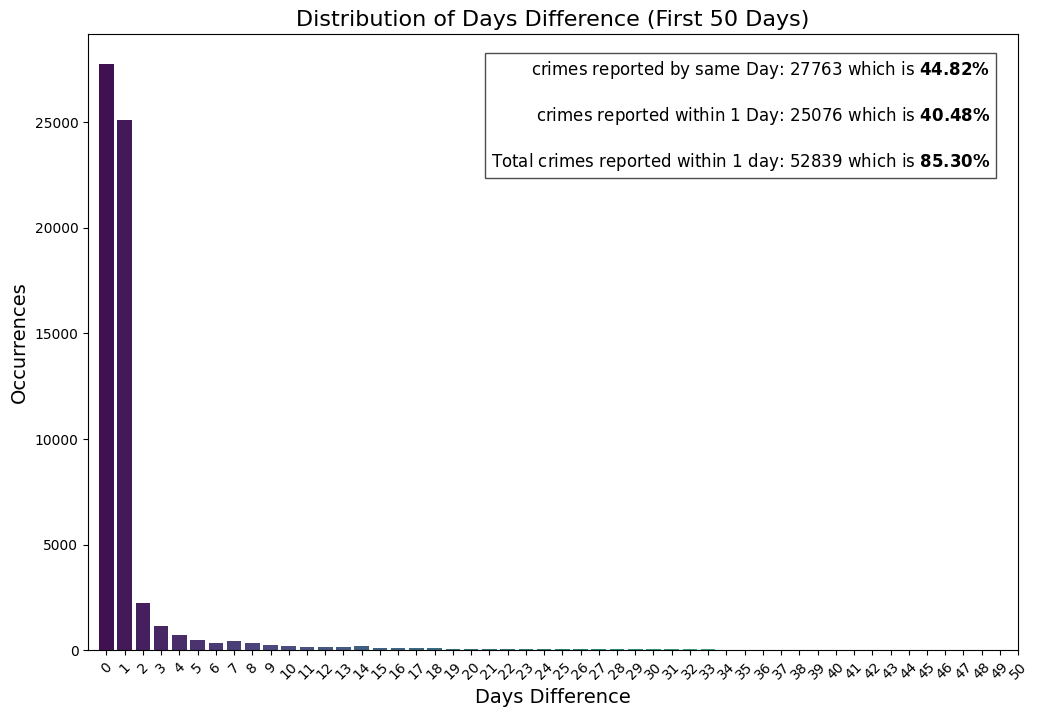

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from IPython.display import display, HTML
from google.colab import files

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Cleaned_Data.csv"    # Read the data from CSV file
df = pd.read_csv(url, parse_dates=['REPORT_DATE', 'OCC_DATE'], low_memory=False)

df['DAYS_DIFFERENCE'] = (df['REPORT_DATE'] - df['OCC_DATE']).dt.days              # Calculate the difference in days between REPORT_DATE and OCC_DATE
df = df[(df['DAYS_DIFFERENCE'] >= 0) & (df['DAYS_DIFFERENCE'] <= 365)]            # Filter out invalid values (0 to 365 days)
day_diff_counts = df['DAYS_DIFFERENCE'].value_counts().reset_index()              # Count occurrences of each 'DAYS_DIFFERENCE'
day_diff_counts.columns = ['Day #', 'Reported number']
day_diff_counts = day_diff_counts.sort_values(by='Day #')

days_range = pd.DataFrame({'Day #': range(0, 90)})                                # Create a DataFrame for days 0 to 89 (90 days total so they can be arranged in 30 rows x 3 columns)
table_df = pd.merge(days_range, day_diff_counts, on='Day #', how='left')
table_df['Reported number'] = table_df['Reported number'].fillna(0).astype(int)

total_incidents = table_df['Reported number'].sum()                               # Calculate totals and percentages
table_df['% Report'] = table_df['Reported number'] / total_incidents * 100
table_df['Total reported until now'] = table_df['Reported number'].cumsum()
table_df['Total % Reported'] = table_df['Total reported until now'] / total_incidents * 100

table_df['Reported number'] = table_df['Reported number'].map(lambda x: f"{x:>10d}")    # Format numeric columns with right-justification
table_df['% Report'] = table_df['% Report'].map(lambda x: f"{x:>6.2f}%")
table_df['Total reported until now'] = table_df['Total reported until now'].map(lambda x: f"{x:>10d}")
table_df['Total % Reported'] = table_df['Total % Reported'].map(lambda x: f"{x:>6.2f}%")

n_cols = 3                                                                        # Reshape the DataFrame into a grid with 3 columns and 30 rows.
n_rows = len(table_df) // n_cols                                                  # Should be 30 rows if table_df has 90 rows

records = table_df.to_dict('records')
grid = []
for i in range(n_rows):
    row_records = []
    for j in range(n_cols):
        idx = j * n_rows + i
        row_records.append(records[idx])
    grid.append(row_records)

                                                                                  # Build the HTML table.
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
  <thead>
    <tr>
      <th colspan="15" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white; padding: 8px;">
        Distribution of Reporting Delays (30 rows x 3 columns)
      </th>
    </tr>
    <tr style='background-color: #4CAF50; color: white;'>
      <th><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
      <th style='border-left: 4px solid #dddddd;'><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
      <th style='border-left: 4px solid #dddddd;'><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
    </tr>
  </thead>
  <tbody>
"""

for row in grid:
    html_table += "<tr>"
    for j, record in enumerate(row):
        if j > 0:                                                                 # For the Day # cell, add bold formatting.
            day_style = "border: 1px solid #dddddd; padding: 8px; text-align: right; border-left: 4px solid #dddddd; "
        else:
            day_style = "border: 1px solid #dddddd; padding: 8px; text-align: right; "
        html_table += f"<td style='{day_style}'><strong>{record['Day #']}</strong></td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Reported number']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['% Report']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Total reported until now']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Total % Reported']}</td>"
    html_table += "</tr>"
html_table += """
  </tbody>
</table>
"""

display(HTML(html_table))


day_diff_counts = df['DAYS_DIFFERENCE'].value_counts().reset_index()              # Count occurrences of each 'DAYS_DIFFERENCE'
day_diff_counts.columns = ['Days Difference', 'Occurrences']
day_diff_counts = day_diff_counts.sort_values(by='Days Difference')

day_diff_filtered = day_diff_counts[day_diff_counts['Days Difference'] <= 50].copy()  # Filter for days <= 50 for the first chart

fig, ax = plt.subplots(figsize=(12, 8))                                           #First Chart: Bar Plot (First 50 Days)
sns.barplot(x='Days Difference', y='Occurrences', data=day_diff_filtered, palette='viridis', ax=ax)
ax.set_title('Distribution of Days Difference (First 50 Days)', fontsize=16)
ax.set_xlabel('Days Difference', fontsize=14)
ax.set_ylabel('Occurrences', fontsize=14)
ax.set_xlim(-1, 50)
ax.set_xticks(day_diff_filtered["Days Difference"])                               # Set tick positions explicitly
ax.set_xticklabels(day_diff_filtered["Days Difference"], rotation=45)             # Then set tick labels

total_incidents = day_diff_counts['Occurrences'].sum()                            # Compute totals for day 0 and day 1 based on the complete dataset
zero_day_count = (day_diff_counts[day_diff_counts['Days Difference'] == 0]['Occurrences']
                  .sum() if not day_diff_counts[day_diff_counts['Days Difference'] == 0].empty else 0)
one_day_count = (day_diff_counts[day_diff_counts['Days Difference'] == 1]['Occurrences']
                 .sum() if not day_diff_counts[day_diff_counts['Days Difference'] == 1].empty else 0)
total_zero_one = zero_day_count + one_day_count

percent_zero = (zero_day_count / total_incidents) * 100 if total_incidents > 0 else 0   # Calculate percentages
percent_one = (one_day_count / total_incidents) * 100 if total_incidents > 0 else 0
percent_total = (total_zero_one / total_incidents) * 100 if total_incidents > 0 else 0

explanation_text = (                                                              # Explanation text with three lines; construct the mathtext for the percentages separately so that only those values are bold.
    f"crimes reported by same Day: {zero_day_count} which is " +
    "$\\mathbf{" + f"{percent_zero:.2f}" + "\\%}$" + "\n\n" +
    f"crimes reported within 1 Day: {one_day_count} which is " +
    "$\\mathbf{" + f"{percent_one:.2f}" + "\\%}$" + "\n\n" +
    f"Total crimes reported within 1 day: {total_zero_one} which is " +
    "$\\mathbf{" + f"{percent_total:.2f}" + "\\%}$"
)

ax.text(0.97, 0.96, explanation_text, transform=ax.transAxes, ha='right', va='top', # Place the explanation text inside the graph at the top-right using axis coordinates
        fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

bar_plot_filename = '/content/5.4 EDA_First_50days.png'                                # Save and download the chart
plt.savefig(bar_plot_filename, bbox_inches='tight', dpi=300)
plt.show()
files.download(bar_plot_filename)

print("\n\n")
Data_Processing_df = pd.read_csv(url, low_memory=False).copy()

html_output_filename = "/content/5.4 Data Reduction and Projection.html"

steps_summary = []                                                                # Store processing steps summary

before_step_1 = Data_Processing_df.shape[0]                                       # Step 1: Dataset Loading
before_columns = Data_Processing_df.shape[1]                                      # Columns at the time of loading dataset
steps_summary.append({
    "Step Taken": "Step 1: Load Dataset",
    "Before Action": before_step_1,
    "Affected by Action": "",
    "After Action": before_step_1,
    "Unit": "Rows"
})

current_rows = Data_Processing_df.shape[0]                                        # Use current row count after loading as reference for subsequent steps

Data_Processing_df['REPORT_DATETIME'] = pd.to_datetime(Data_Processing_df['REPORT_DATE']) + pd.to_timedelta(Data_Processing_df['REPORT_HOUR'], unit='h')    # Step 2: Create datetime columns for 'REPORT_DATETIME' and 'OCC_DATETIME'
Data_Processing_df['OCC_DATETIME'] = pd.to_datetime(Data_Processing_df['OCC_DATE']) + pd.to_timedelta(Data_Processing_df['OCC_HOUR'], unit='h')

rows_after_datetime = Data_Processing_df.shape[0]                                 # The row count remains unchanged after creating datetime columns
steps_summary.append({
    "Step Taken": "Step 2: Feature Engineering - Join the Date & Time",
    "Before Action": current_rows,
    "Affected by Action": "New Columns Added",
    "After Action": rows_after_datetime,
    "Unit": "Rows"
})

reporting_timedelta = Data_Processing_df['REPORT_DATETIME'] - Data_Processing_df['OCC_DATETIME']  # Step 3: Calculate the reporting delay (days + hours only)
Data_Processing_df['reporting_delay_days'] = reporting_timedelta.dt.days
Data_Processing_df['reporting_delay_hours'] = (reporting_timedelta.dt.seconds // 3600)  # Convert seconds to full hours

rows_after_delay_calc = Data_Processing_df.shape[0]                               # The row count remains unchanged after calculating delays
steps_summary.append({
    "Step Taken": "Step 3: Feature Engineering: Compute Reporting Delay in Days & Hours",
    "Before Action": rows_after_datetime,
    "Affected by Action": "New Columns Added",
    "After Action": rows_after_delay_calc,
    "Unit": "Rows"
})

before_delay_filter = Data_Processing_df.shape[0]                                 # Step 4: Filter records with reporting delays between 0 to 60 days
Data_Processing_df = Data_Processing_df[
    (Data_Processing_df['reporting_delay_days'] >= 0) &
    (Data_Processing_df['reporting_delay_days'] <= 1)
].copy()
after_delay_filter = Data_Processing_df.shape[0]
delay_filtered_rows = before_delay_filter - after_delay_filter

steps_summary.append({
    "Step Taken": "Step 4: Only Keep Complaints with 0-60 Days Delay",
    "Before Action": before_delay_filter,
    "Affected by Action": delay_filtered_rows,
    "After Action": after_delay_filter,
    "Unit": "Rows"
})

columns_to_drop = ['REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', # Step 5: Drop unnecessary columns
                   'HOOD_140', 'NEIGHBOURHOOD_140', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY',
                   'REPORT_DATE', 'OCC_DATE', 'REPORT_HOUR', 'REPORT_DATETIME']
columns_before_drop = Data_Processing_df.shape[1]

dropped_column_names = [col for col in columns_to_drop if col in Data_Processing_df.columns]  # Store column names before dropping

Data_Processing_df = Data_Processing_df.drop(columns=dropped_column_names).copy() # Drop columns
columns_after_drop = Data_Processing_df.shape[1]
dropped_columns = columns_before_drop - columns_after_drop

steps_summary.append({
    "Step Taken": "Step 5: Dropped Unnecessary Columns",
    "Before Action": columns_before_drop,
    "Affected by Action": dropped_columns,
    "After Action": columns_after_drop,
    "Unit": "Columns"
})

Data_Processing_df.to_csv('Final_Data.csv', index=False)                          # Save the final data to a CSV file

steps_summary.append({                                                            # Step 8: Summary - Rows Affected
    "Step Taken": "Rows Affected in <strong>5.4 Data Reduction and Projection</strong>",
    "Before Action": f"Initial Load:<br><strong>{before_step_1}</strong>",
    "Affected by Action": f"Rows Filtered:<br><strong>{before_step_1 - after_delay_filter}</strong>",
    "After Action": f"Final Count: <br><strong>{after_delay_filter}</strong>",
    "Unit": "Rows"
})

steps_summary.append({                                                            # Step 9: Summary - Columns Affected
    "Step Taken": "Columns Affected in <strong>5.4 Data Reduction and Projection</strong>",
    "Before Action": f"Initial Load:<br><strong>{before_columns}</strong>",
    "Affected by Action": f"Columns Dropped:<br><strong>{dropped_columns}</strong>",
    "After Action": f"Final Count: <br><strong>{columns_after_drop}</strong>",
    "Unit": "Columns"
})
                                                                                  # Create HTML Table with styling
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="5" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">
                <strong>5.4 Data Reduction and Projection</strong>
            </th>
        </tr>
        <tr>
            <th>Step Taken</th>
            <th>Before Action</th>
            <th>Affected by Action</th>
            <th>After Action</th>
            <th>Unit</th>
        </tr>
    </thead>
    <tbody>
"""

for step in steps_summary:
    html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Step Taken']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Before Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Affected by Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['After Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Unit']}</td>
    </tr>
    """
html_table += "</tbody></table>"

                                                                                  # Final message about saved data
final_message = """
<div style="font-size: 18px; color: #333; font-weight: bold; padding: 10px;">
    The final data after Data Reduction and Projection has been saved as <span style="color: blue;">'Final_Data.csv'</span> for further analysis.
</div>
"""

display(HTML(html_table))                                                         # Display the tables
display(HTML(final_message))                                                      # Display the final message

with open(html_output_filename, 'w', encoding='utf-8') as f:
    f.write(html_table)
    f.write(final_message)

files.download(html_output_filename)                                              # Download HTML File
files.download('Final_Data.csv')                                                  # Download CSV File
print("\n\n")

### **5.4 Data Reduction and Projection - e) EDA**

Generating Box Plot for Numerical Features...


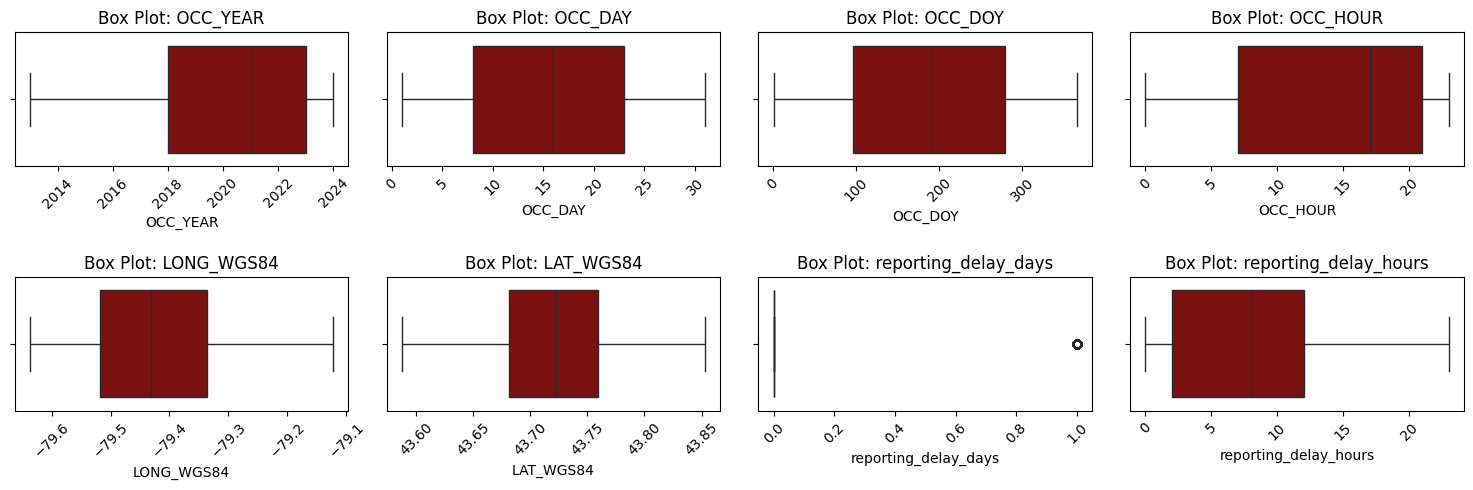

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generating Line Chart for Missing Values per Column...


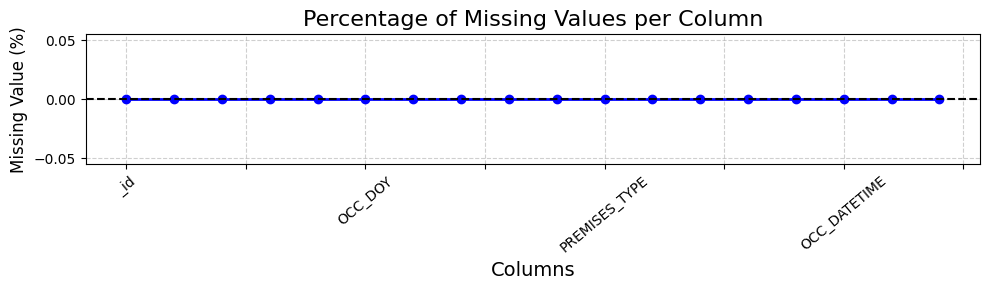

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generating Bar Plots for Incidents per Year, Month, and Day of the Week...


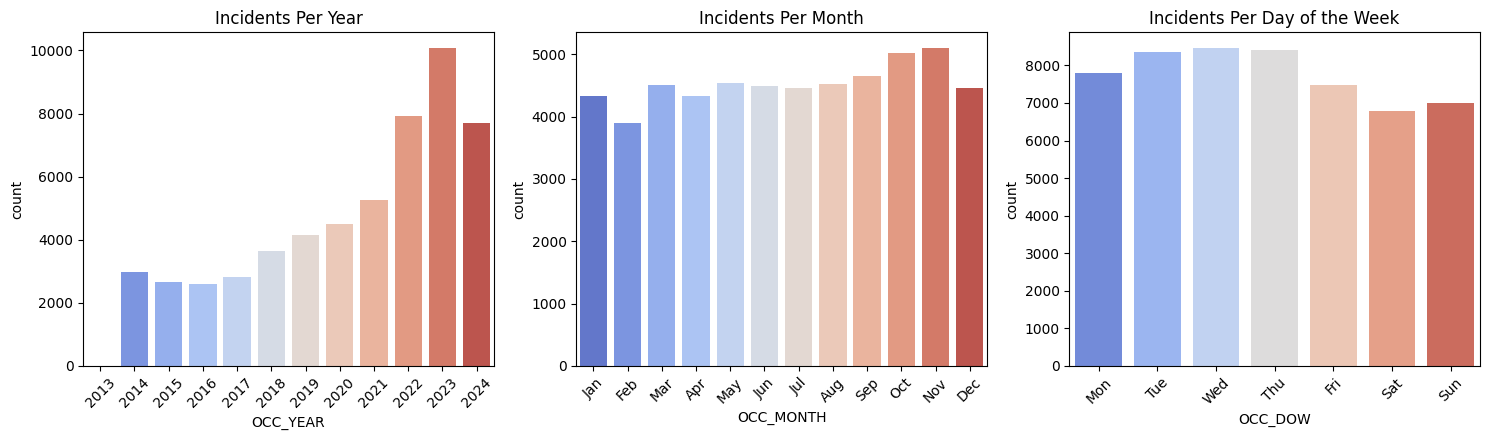

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generating Distribution Plots for Categorical Features...

===== DIVISION Distribution =====

DIVISION
D23    7021
D32    6552
D31    5351
D22    5341
D42    4586
D43    3228
D33    3137
D53    3093
D41    2989
D12    2847
D55    2433
D13    2151
D14    1640
D11    1621
D51    1266
D52     780
D54     275




<ipython-input-6-2a8dc1b56b54>:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_yticklabels(labels)
<ipython-input-6-2a8dc1b56b54>:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_yticklabels(labels)



===== LOCATION_TYPE Distribution =====

LOCATION_TYPE
Single Home, House (Attach Garage, Cottage, Mobile)                       18882
Parking Lots (Apt., Commercial Or Non-Commercial)                         17965
Streets, Roads, Highways (Bicycle Path, Private Road)                     10848
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg     1794
Private Property Structure (Pool, Shed, Detached Garage)                   1514
Apartment (Rooming House, Condo)                                           1457
Dealership (Car, Motorcycle, Marine, Trailer, Etc.)                         472
Gas Station (Self, Full, Attached Convenience)                              282
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)           218
Open Areas (Lakes, Parks, Rivers)                                           134
Bar / Restaurant                                                            124
Ttc Subway Station                                               

<ipython-input-6-2a8dc1b56b54>:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_yticklabels(labels)
<ipython-input-6-2a8dc1b56b54>:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_yticklabels(labels)



===== NEIGHBOURHOOD_158 Distribution =====

NEIGHBOURHOOD_158
West Humber-Clairville (1)                3724
York University Heights (27)              1254
Etobicoke City Centre (159)               1118
Milliken (130)                             925
Humber Summit (21)                         893
Oakdale-Beverley Heights (154)             839
Bedford Park-Nortown (39)                  834
Yorkdale-Glen Park (31)                    818
Glenfield-Jane Heights (25)                798
Newtonbrook West (36)                      798
Wexford/Maryvale (119)                     792
Mount Olive-Silverstone-Jamestown (2)      747
Clanton Park (33)                          705
Humbermede (22)                            629
Willowridge-Martingrove-Richview (7)       623
Kingsview Village-The Westway (6)          596
Morningside Heights (144)                  596
Stonegate-Queensway (16)                   591
Bendale-Glen Andrew (156)                  577
Weston (113)                               5

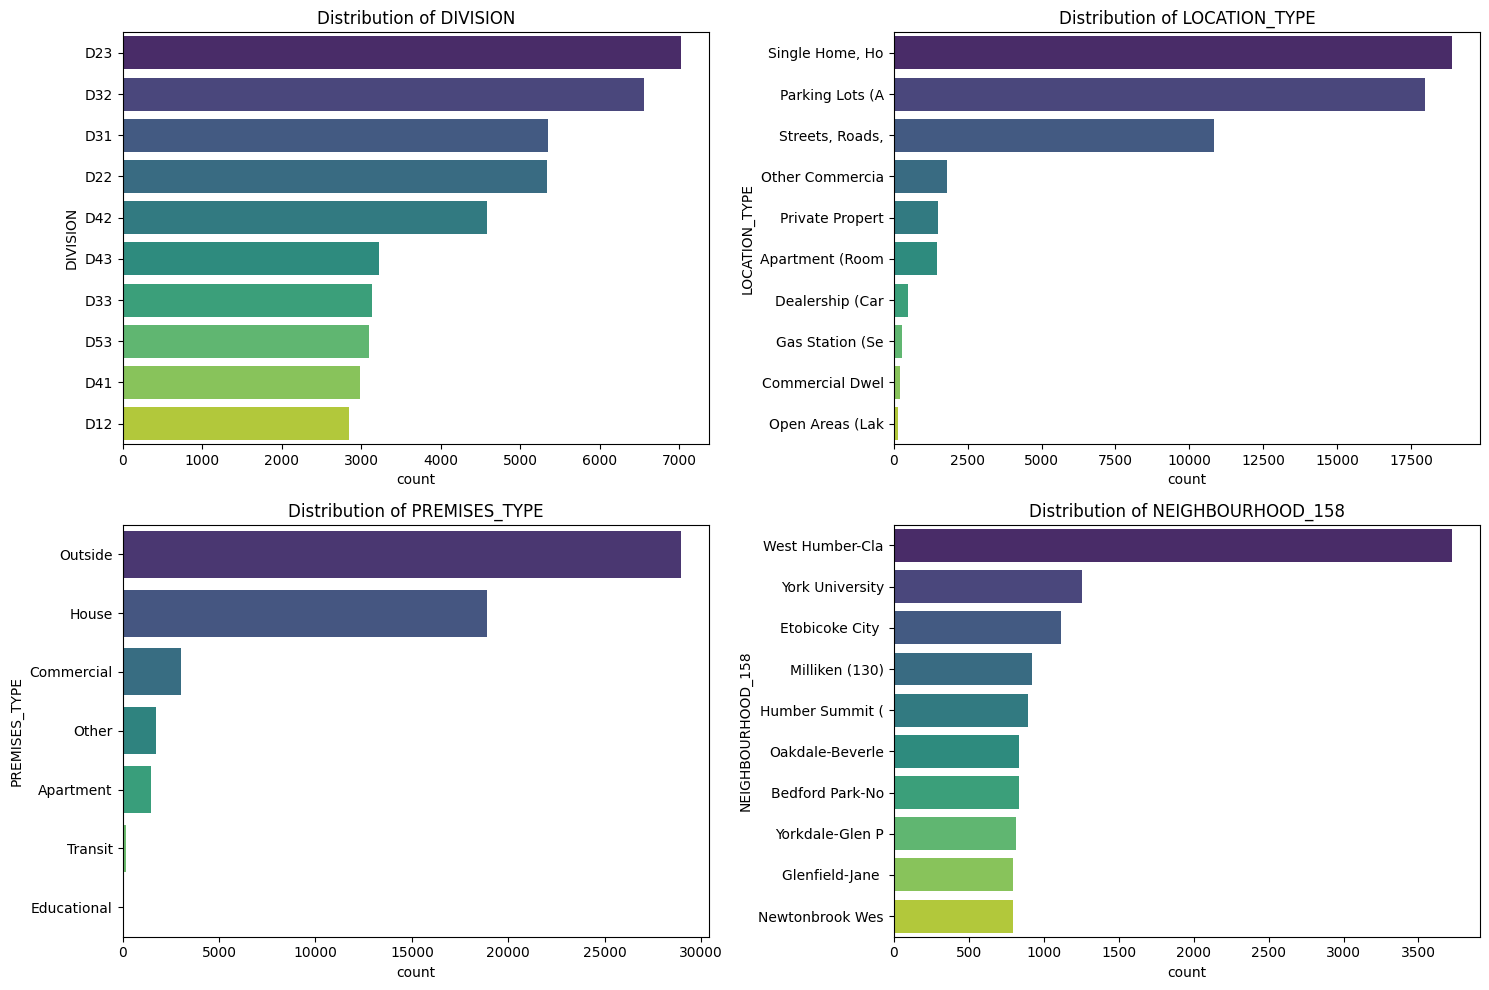

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generating Colour Coded Scatter Plot for Geographic Distribution...


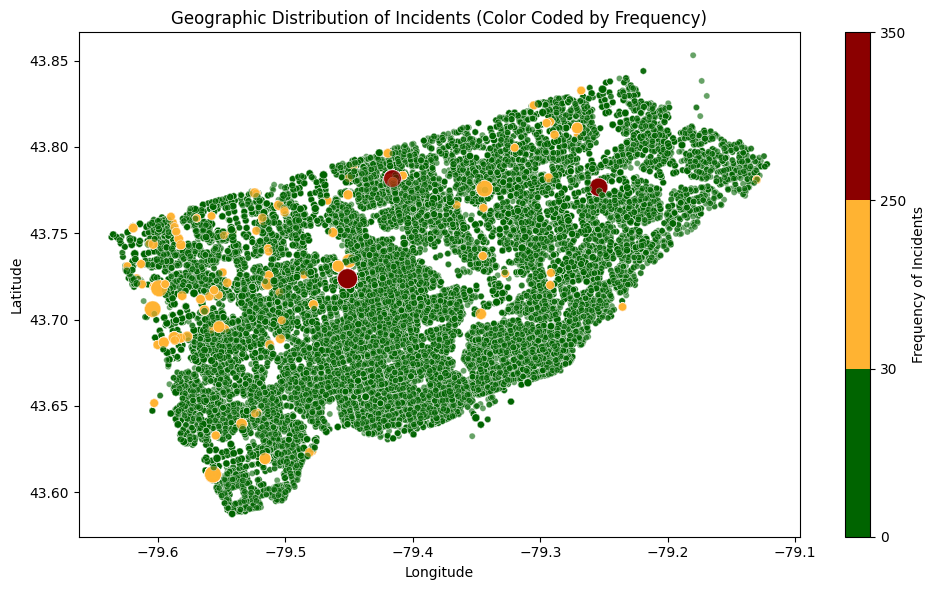

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


===== Top 10 Most Frequent Incident Locations =====

Geo_Location
-79.4513062, 43.7236571    346
-79.2542411, 43.7766363    290
-79.4159903, 43.781633     265
-79.5991709, 43.7180963    237
-79.5569096, 43.6101506    236
-79.3437465, 43.7758819    228
-79.6042074, 43.7060265    226
-79.4501051, 43.733978     150
-79.5141279, 43.7206421    105
-79.587293, 43.6895127     100
Generating Correlation Heatmap...

===== Correlation Matrix =====
                       OCC_YEAR   OCC_DAY   OCC_DOY  OCC_HOUR  LONG_WGS84  \
OCC_YEAR               1.000000  0.000366 -0.041942 -0.050614    0.073160   
OCC_DAY                0.000366  1.000000  0.076077 -0.005412   -0.001582   
OCC_DOY               -0.041942  0.076077  1.000000 -0.001693    0.003060   
OCC_HOUR              -0.050614 -0.005412 -0.001693  1.000000   -0.002338   
LONG_WGS84             0.073160 -0.001582  0.003060 -0.002338    1.000000   
LAT_WGS84              0.037494  0.003682 -0.005110 -0.016461    0.422169   
reporting_delay_ho

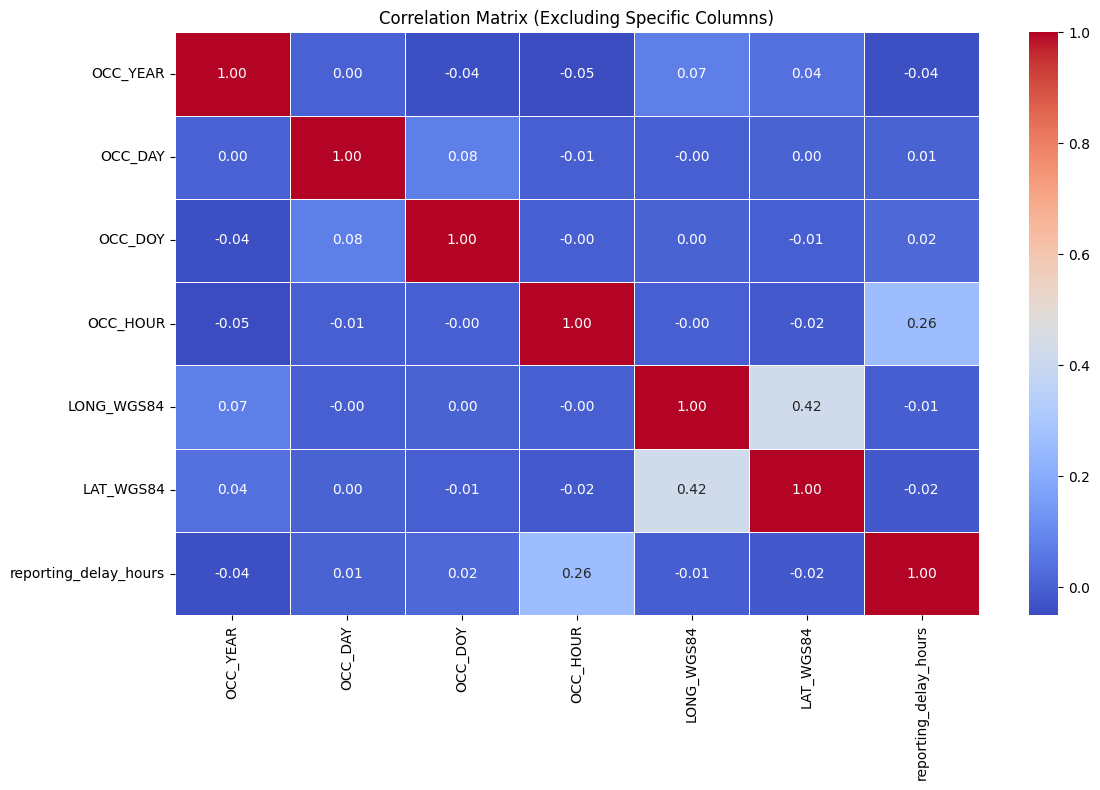

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from scipy import stats
from IPython.display import display, HTML
from google.colab import files
import os

                                                                                  # Ignore specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

                                                                                  # Read the dataset from CSV (using the URL)
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Final_Data.csv"
original_df = pd.read_csv(url, low_memory=False)

                                                                                  # Create copies for different visualizations
df_box = original_df.copy().drop(columns=['_id', 'EVENT_UNIQUE_ID', 'HOOD_158'])
df_line = original_df.copy()                                                      # For missing values line chart
df_bar = original_df.copy().drop(columns=['_id', 'EVENT_UNIQUE_ID', 'HOOD_158'])
df_cat = df_bar.copy()                                                            # For categorical distribution
df_geo = original_df.copy()                                                       # For geographic scatter
df_corr = original_df.copy()                                                      # For correlation heatmap
                                                                                  # 1) Box Plot of Numerical Features
print("Generating Box Plot for Numerical Features...")
numerical_columns = df_box.select_dtypes(include=['float64', 'int64']).columns
ncols = 4                                                                         # 4 box plots per row
nrows = (len(numerical_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 2.5 * nrows))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_box[col], ax=axes[i], color="#8A0000")
    axes[i].set_title(f"Box Plot: {col}")
    axes[i].tick_params(axis='x', rotation=45)
                                                                                  # Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
box_plot_filepath = "EDA_Boxplot_Numerical_Features.png"
plt.savefig(box_plot_filepath)
plt.show()
files.download(box_plot_filepath)
                                                                                  # 2) Line Chart: Percentage of Missing Values per Column
print("Generating Line Chart for Missing Values per Column...")
missing_percent = df_line.isnull().mean() * 100
plt.figure(figsize=(10, 3))
missing_percent.plot(kind='line', color='b', marker='o', linestyle='-', linewidth=2)
plt.axhline(0, color='black', linestyle='--')
plt.title("Percentage of Missing Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Missing Value (%)", fontsize=12)
plt.xticks(rotation=40)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
missing_values_chart_path = "EDA_Missing_Values.png"
plt.savefig(missing_values_chart_path)
plt.show()
files.download(missing_values_chart_path)
                                                                                  # 3) Bar Plot: Incidents per Year, Month, Day of the Week
print("Generating Bar Plots for Incidents per Year, Month, and Day of the Week...")
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5))
                                                                                  # Ensure proper data types and ordering
df_bar['OCC_YEAR'] = df_bar['OCC_YEAR'].astype(int)
df_bar['OCC_MONTH'] = df_bar['OCC_MONTH'].str[:3]                                 # Use first 3 letters
df_bar['OCC_DOW'] = df_bar['OCC_DOW'].str[:3]                                     # Use first 3 letters
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dow_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_bar['OCC_MONTH'] = pd.Categorical(df_bar['OCC_MONTH'], categories=month_order, ordered=True)
df_bar['OCC_DOW'] = pd.Categorical(df_bar['OCC_DOW'], categories=dow_order, ordered=True)
sns.countplot(x='OCC_YEAR', data=df_bar, palette='coolwarm', ax=axes[0]).set_title("Incidents Per Year")
sns.countplot(x='OCC_MONTH', data=df_bar, palette='coolwarm', ax=axes[1]).set_title("Incidents Per Month")
sns.countplot(x='OCC_DOW', data=df_bar, palette='coolwarm', ax=axes[2]).set_title("Incidents Per Day of the Week")
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
incidents_path = "EDA_Incidents_Per_Year_Month_DayOfWeek.png"
plt.tight_layout()
plt.savefig(incidents_path)
plt.show()
files.download(incidents_path)
                                                                                  # 4) Bar Plot: Distribution of Categorical Features
                                                                                  # (DIVISION, LOCATION_TYPE, PREMISES_TYPE, NEIGHBOURHOOD_158)
print("Generating Distribution Plots for Categorical Features...")
categorical_columns = ['DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'NEIGHBOURHOOD_158']
fig, axes = plt.subplots(len(categorical_columns) // 2, 2, figsize=(15, 5 * (len(categorical_columns) // 2)))
axes = axes.flatten()
for idx, col in enumerate(categorical_columns):
    print(f"\n===== {col} Distribution =====\n")
    print(df_cat[col].value_counts().to_string())
    print("\n" + "="*40 + "\n")
    top_categories = df_cat[col].value_counts().nlargest(10)
    sns.countplot(y=df_cat[col], order=top_categories.index, palette="viridis", ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")
    labels = [label.get_text()[:15] for label in axes[idx].get_yticklabels()]
    axes[idx].set_yticklabels(labels)
plt.tight_layout()
categorical_dist_path = "EDA_Categorical_Distribution.png"
plt.savefig(categorical_dist_path)
plt.show()
files.download(categorical_dist_path)
                                                                                  # 5) Colour Coded Scatter Plot (Geographic Distribution)
print("Generating Colour Coded Scatter Plot for Geographic Distribution...")
df_geo['Geo_Location'] = df_geo['LONG_WGS84'].round(7).astype(str) + ", " + df_geo['LAT_WGS84'].round(7).astype(str)
location_counts = df_geo['Geo_Location'].value_counts()
df_geo['Location_Frequency'] = df_geo['Geo_Location'].map(location_counts)
boundaries = [0, 30, 250, 350]
colors = ['#006400', '#FFFF00', '#FF6666', '#8B0000']
cmap = LinearSegmentedColormap.from_list("custom_green_yellow_red", colors, N=256)
norm = BoundaryNorm(boundaries, cmap.N)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='LONG_WGS84', y='LAT_WGS84', data=df_geo, hue='Location_Frequency', palette=cmap,
                size='Location_Frequency', sizes=(20, 200), alpha=0.6, legend=None,
                hue_norm=norm, ax=ax)
ax.set_title("Geographic Distribution of Incidents (Color Coded by Frequency)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label="Frequency of Incidents")
plt.tight_layout()
geo_plot_filepath = "Geographic_Scatter_Plot.png"
plt.savefig(geo_plot_filepath, dpi=300, bbox_inches='tight')
plt.show()
files.download(geo_plot_filepath)
print("\n===== Top 10 Most Frequent Incident Locations =====\n")
print(location_counts.head(10).to_string())
print("="*40)

                                                                                  # 6) Correlation Heatmap
print("Generating Correlation Heatmap...")
df_corr_clean = df_corr.drop(columns=['_id', 'EVENT_UNIQUE_ID', 'reporting_delay_days', 'HOOD_158'])
df_corr_clean['OCC_MONTH'] = pd.Categorical(df_corr_clean['OCC_MONTH'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'], ordered=False)
df_corr_clean['OCC_DOW'] = pd.Categorical(df_corr_clean['OCC_DOW'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=False)
df_numerical = df_corr_clean.select_dtypes(include=[np.number])
correlation_matrix = df_numerical.corr()
print("\n===== Correlation Matrix =====")
print(correlation_matrix)
print("="*40)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Matrix (Excluding Specific Columns)")
plt.tight_layout()
corr_plot_filepath = "Correlation_Heatmap.png"
plt.savefig(corr_plot_filepath, dpi=300, bbox_inches='tight')
plt.show()
files.download(corr_plot_filepath)


### **5.4.3 Feature Engineering - Approach_2**

In [2]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from google.colab import files
from IPython.display import display, HTML

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Final_Data.csv"  # URL of the Dataset
try:
  df = pd.read_csv(url)
except Exception as e:
  display(HTML(f"<p style='color: red; font-size: 16px; font-weight: bold;'>Error loading data: {e}</p>"))
  exit()

Data_Preparing_df = pd.read_csv(url)
display(HTML("<p style='color: green; font-size: 16px; font-weight: bold;'>Data loaded successfully.</p>"))

                                                                                  # Capture initial column count
initial_cols_count = len(Data_Preparing_df.columns)

steps_summary = []                                                                # Table to store results

                                                                                  # Process OCC_MONTH conversion (Step 1: Feature Engineering)  -> Convert month names to numeric
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}; Data_Preparing_df['OCC_MONTH_Num'] = Data_Preparing_df['OCC_MONTH'].map(month_mapping)
steps_summary.append({
    "Original Feature": "OCC_MONTH",
    "Action Taken": "Converted to 'OCC_MONTH_Num' (numeric)",
    "Rationale": "Clustering algorithms require numeric data for distance computations"
})
                                                                                  # Convert OCC_HOUR to integer
df['OCC_HOUR'] = df['OCC_HOUR'].astype(int)
                                                                                  # Process OCC_DOW conversion (Step 2: Feature Engineering)  -> Convert day names to numeric
dow_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}; Data_Preparing_df['OCC_DOW_Num'] = Data_Preparing_df['OCC_DOW'].map(dow_mapping)
steps_summary.append({
    "Original Feature": "OCC_DOW",
    "Action Taken": "Converted to 'OCC_DOW_Num' (numeric)",
    "Rationale": "Numeric encoding required for clustering algorithms"
})

                                                                                  # Process DOW_Weekend creation (Step 3: Feature Engineering)  -> Create binary indicator for weekend
Data_Preparing_df['DOW_Weekend'] = Data_Preparing_df['OCC_DOW_Num'].apply(lambda x: 1 if x in [6,7] else 0)
steps_summary.append({
    "Original Feature": "OCC_DOW_Num",
    "Action Taken": "Created 'DOW_Weekend' (1 for Sat & Sun, else 0)",
    "Rationale": "Captures weekend-specific patterns"
})

                                                                                  # Process DOW_Begin creation (Step 4: Feature Engineering)  -> Create binary indicator for beginning of week
Data_Preparing_df['DOW_Begin'] = Data_Preparing_df['OCC_DOW_Num'].apply(lambda x: 1 if x in [1,2,3] else 0)
steps_summary.append({
    "Original Feature": "OCC_DOW_Num",
    "Action Taken": "Created 'DOW_Begin' (1 for Mon-Tue-Wed, else 0)",
    "Rationale": "Helps detect trends at the beginning of the week"
})

                                                                                  # Process DOW_Mid creation (Step 5: Feature Engineering)  -> Create binary indicator for mid-week
Data_Preparing_df['DOW_Mid'] = Data_Preparing_df['OCC_DOW_Num'].apply(lambda x: 1 if x in [4,5] else 0)
steps_summary.append({
    "Original Feature": "OCC_DOW_Num",
    "Action Taken": "Created 'DOW_Mid' (1 for Thu & Fri, else 0)",
    "Rationale": "Distinguishes mid-week patterns"
})

                                                                                  # Capture final column count after feature engineering
final_cols_count = len(Data_Preparing_df.columns)
                                                                                  # Summary Row for Feature Engineering
steps_summary.append({
    "Original Feature": "Columns affected in <br><strong>5.4.3 Feature Engineering - Approach_2</strong>",
    "Action Taken": "Initial Columns: <strong><br>" + str(initial_cols_count) + "</strong>",
    "Rationale": "Final Columns: <strong><br>" + str(final_cols_count) + "</strong>",
})

                                                                                  # Build HTML Table for Feature Engineering Phase with alternate row shading
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="3" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">5.4.3 Feature Engineering Phase - Approach_2</th>
        </tr>
        <tr>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Original Feature</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Action Taken</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Rationale</th>
        </tr>
    </thead>
    <tbody>
"""

                                                                                  # Add rows with alternating shading
for i, step in enumerate(steps_summary):
                                                                                  # Add background color for alternating rows (even rows get light gray)
    bg_color = "#f2f2f2" if i % 2 == 0 else "white"
    html_table += f"""
        <tr style='border: 1px solid #dddddd; background-color: {bg_color};'>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step["Original Feature"]}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step["Action Taken"]}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step["Rationale"]}</td>
        </tr>
    """

                                                                                  # Add footer note inside the table
note_text = (
    "Feature Engineering completed and saved as <span style='color: green;'>FEngineered_New.csv</span> "
    "for further analysis."
)
html_table += f"""
        <tr style='border: 1px solid #dddddd;'>
            <td colspan="3" style='border: 1px solid #dddddd; padding: 8px; background-color: #f8f8f8;'><strong>{note_text}</strong></td>
        </tr>
    </tbody>
</table>
"""
display(HTML(html_table))

Data_Preparing_df.to_csv("FEngineered_New.csv", index=False)                      # Save engineered data as FEngineered_New.csv
files.download("FEngineered_New.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **5.4.4 Feature Encoding - Approach_1**

### **5.4 Data Reduction and Projection - f) Feature Engineering, g) Feature Encoding and h) Descriptive Statistics - Approach_2**


In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files
from IPython.display import display, HTML

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FEngineered_New.csv"  # URL of the Dataset
try:
    Data_Encoding_df = pd.read_csv(url)
    display(HTML("<p style='color: green; font-size: 16px; font-weight: bold;'>Previously engineered data loaded successfully.</p>"))
except Exception as e:
    display(HTML(f"<p style='color: red; font-size: 16px; font-weight: bold;'>Error loading engineered data: {e}</p>"))
    exit()
steps_summary = []                                                                # Table to store encoding steps
                                                                                  # Count initial columns before encoding
initial_column_count = len(Data_Encoding_df.columns)
initial_columns = ", ".join(Data_Encoding_df.columns.tolist())
                                                                                  # 1. Frequency Encoding for DIVISION
division_freq = Data_Encoding_df['DIVISION'].value_counts(normalize=True)
Data_Encoding_df['Division_Freq'] = Data_Encoding_df['DIVISION'].map(division_freq)
steps_summary.append({
    "Original Feature": "DIVISION",
    "Action Taken": "Frequency encoded as 'Division_Freq'",
    "Rationale": "Converts categorical division names to numeric values based on occurrence frequency"
})
                                                                                  # 2. Frequency Encoding for LOCATION_TYPE
location_freq = Data_Encoding_df['LOCATION_TYPE'].value_counts(normalize=True)
Data_Encoding_df['LOCATION_Freq'] = Data_Encoding_df['LOCATION_TYPE'].map(location_freq)
steps_summary.append({
    "Original Feature": "LOCATION_TYPE",
    "Action Taken": "Frequency encoded as 'LOCATION_Freq'",
    "Rationale": "Transforms location categories into normalized frequency values"
})
                                                                                  # 3. Frequency Encoding for PREMISES_TYPE
premises_freq = Data_Encoding_df['PREMISES_TYPE'].value_counts(normalize=True)
Data_Encoding_df['PREMISES_Freq'] = Data_Encoding_df['PREMISES_TYPE'].map(premises_freq)
steps_summary.append({
    "Original Feature": "PREMISES_TYPE",
    "Action Taken": "Frequency encoded as 'PREMISES_Freq'",
    "Rationale": "Converts premises types to numeric values based on their relative frequency"
})
                                                                                  # 4. Hierarchical feature combining LOCATION_Freq and PREMISES_Freq
Data_Encoding_df['Loca_Premi_Freq'] = Data_Encoding_df['LOCATION_Freq'] * Data_Encoding_df['PREMISES_Freq']
steps_summary.append({
    "Original Feature": "LOCATION_Freq, PREMISES_Freq",
    "Action Taken": "Created hierarchical feature 'Loca_Premi_Freq'",
    "Rationale": "Captures the joint probability distribution of location and premises types"
})
                                                                                  # 5. Frequency Encoding for HOOD_158
hood_freq = Data_Encoding_df['HOOD_158'].value_counts(normalize=True)
Data_Encoding_df['HOOD_Freq'] = Data_Encoding_df['HOOD_158'].map(hood_freq)
steps_summary.append({
    "Original Feature": "HOOD_158",
    "Action Taken": "Frequency encoded as 'HOOD_Freq'",
    "Rationale": "Encodes neighborhood categories as normalized frequency values"
})
                                                                                  # 6. Hierarchical feature engineering of Division_Freq and HOOD_Freq
Data_Encoding_df['DIV_HOOD_Hier'] = Data_Encoding_df['Division_Freq'] * Data_Encoding_df['HOOD_Freq']
steps_summary.append({
    "Original Feature": "Division_Freq, HOOD_Freq",
    "Action Taken": "Created hierarchical feature 'DIV_HOOD_Hier'",
    "Rationale": "Captures spatial hierarchy relationship between divisions and neighborhoods"
})
                                                                                  # 7. PCA on LONG_WGS84 and LAT_WGS84
                                                                                  # Select only rows with valid coordinates
coord_columns = ['LONG_WGS84', 'LAT_WGS84']
valid_coords = Data_Encoding_df[coord_columns].dropna()
                                                                                  # Apply PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(StandardScaler().fit_transform(valid_coords))
                                                                                  # Create a temporary dataframe with index and PCA result
temp_df = pd.DataFrame({
    'index': valid_coords.index,
    'LONG_LAT_PCA': pca_result.flatten()
})
                                                                                  # Merge back to original dataframe
Data_Encoding_df = Data_Encoding_df.join(temp_df.set_index('index'), how='left')

steps_summary.append({
    "Original Feature": "LONG_WGS84, LAT_WGS84",
    "Action Taken": "Applied PCA to create 'LONG_LAT_PCA'",
    "Rationale": "Dimensionality reduction of geographic coordinates into a single numeric feature"
})
                                                                                  # Count final columns after encoding
final_column_count = len(Data_Encoding_df.columns)
affected_columns = ["Division_Freq", "LOCATION_Freq", "PREMISES_Freq", "Loca_Premi_Freq",
                     "HOOD_Freq", "DIV_HOOD_Hier", "LONG_LAT_PCA"]
columns_affected = ", ".join(affected_columns)
                                                                                  # Build HTML Table for Feature Encoding Phase with alternate row shading
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="3" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">5.4.4 Feature Encoding Phase - Approach_2</th>
        </tr>
        <tr>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Original Feature</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Action Taken</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Rationale</th>
        </tr>
    </thead>
    <tbody>
"""
                                                                                  # Add rows with alternating shading
for i, step in enumerate(steps_summary):
                                                                                  # Add background color for alternating rows (even rows get light gray)
    bg_color = "#f2f2f2" if i % 2 == 0 else "white"
    html_table += f"""
        <tr style='border: 1px solid #dddddd; background-color: {bg_color};'>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step["Original Feature"]}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step["Action Taken"]}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{step["Rationale"]}</td>
        </tr>
    """
                                                                                  # Add row showing columns affected with the requested formatting
bg_color = "#f2f2f2" if len(steps_summary) % 2 == 0 else "white"
html_table += f"""
    <tr style='border: 1px solid #dddddd; background-color: {bg_color};'>
        <td style='border: 1px solid #dddddd; padding: 8px;'>Columns affected in <br> <strong>5.4.4. Feature Encoding - Approach_2</strong></td>
        <td style='border: 1px solid #dddddd; padding: 8px;'><strong>:</strong> Initial columns: <br> <strong>{initial_column_count}</strong></td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>Final Columns: <br> <strong>{final_column_count}</strong></td>
    </tr>
"""
                                                                                  # Add footer note inside the table
note_text = (
    "Feature Encoding completed and saved as <span style='color: green;'>Encoded_Features.csv</span> "
    "for further analysis."
)
html_table += f"""
        <tr style='border: 1px solid #dddddd;'>
            <td colspan="3" style='border: 1px solid #dddddd; padding: 8px; background-color: #f8f8f8;'><strong>{note_text}</strong></td>
        </tr>
    </tbody>
</table>
"""
display(HTML(html_table))
                                                                                  # Save encoded data to CSV
Data_Encoding_df.to_csv("FE_Encoded_New.csv", index=False)
files.download("FE_Encoded_New.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
                                                                                  # SUMMARY TABLE ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import HTML
from google.colab import files

display(HTML("<h2 style='color: navy;'>Descriptive Statistics: Summary Table Analysis of Encoded Data - Approach_2</h2>"))
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FE_Encoded_New.csv" # URL of the Dataset
df_summary = pd.read_csv(url)
def count_leading_trailing_spaces(column):
    column = column.astype(str)
    return column.str.startswith(' ').sum(), column.str.endswith(' ').sum()
def prepare_summary_table(df):
    unique_values = df.nunique()
    total_values = df.count() + df.isnull().sum()
    null_counts = df.isnull().sum()
    nan_counts = df.isna().sum()
    null_percentages = (null_counts / total_values) * 100
    leading_spaces, trailing_spaces = zip(*[count_leading_trailing_spaces(df[col]) for col in df.columns])
    summary_table = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes,
        "Total Values": total_values,
        "Unique Values": unique_values,
        "Null Values": null_counts,
        "Null %": null_percentages.round(1),
        "NaN Values": nan_counts,
        "Leading Spaces": leading_spaces,
        "Trailing Spaces": trailing_spaces
    })
    return summary_table, null_counts, null_percentages
def generate_summary_html(summary_table):
    summary_table_html = """
    <style>
        table { border-collapse: collapse; width: 100%; font-family: Arial, sans-serif; font-size: 16px; }
        table th, table td { border: 1px solid #ddd; padding: 8px; text-align: left; }
        table th { background-color: #4CAF50; color: white; font-size: 16px; }
        table tr:nth-child(even) {background-color: #f2f2f2;}
        table tr:hover {background-color: #ddd;}
    </style>
    <table>
        <tr>
            <th>Column</th>
            <th>Data Type</th>
            <th>Total Values</th>
            <th>Unique Values</th>
            <th>Null Values</th>
            <th>Null %</th>
            <th>NaN Values</th>
            <th>Leading Spaces</th>
            <th>Trailing Spaces</th>
        </tr>
    """
    for _, row in summary_table.iterrows():
        null_color = "red" if row['Null Values'] > 0 else "green"
        leading_color = "red" if row['Leading Spaces'] > 0 else "green"
        trailing_color = "red" if row['Trailing Spaces'] > 0 else "green"
        summary_table_html += f"""
        <tr>
            <td>{row['Column']}</td>
            <td>{row['Data Type']}</td>
            <td style='color: green;'>{row['Total Values']}</td>
            <td style='color: green;'>{row['Unique Values']}</td>
            <td style='color:{null_color};'>{row['Null Values']}</td>
            <td>{row['Null %']}</td>
            <td>{row['NaN Values']}</td>
            <td style='color:{leading_color};'>{row['Leading Spaces']}</td>
            <td style='color:{trailing_color};'>{row['Trailing Spaces']}</td>
        </tr>
        """
    summary_table_html += "</table>"
    return summary_table_html
def plot_missing_percentage(df, dataset_name):
    missing_percentage = df.isnull().mean() * 100
    missing_percentage = missing_percentage[missing_percentage > 0]
    if missing_percentage.empty:
        display(HTML(f"<p style='color: black; font-size: 16px; font-weight: bold;'>No missing data in {dataset_name}. Skipping missing percentage plot.</p>"))
        return ""
    plt.figure(figsize=(10, 6))
    missing_percentage.sort_values().plot(kind='barh', color='skyblue', edgecolor='grey')
    plt.title(f'Missing Data Percentage - {dataset_name}', fontsize=16)
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    missing_plot_path = f'/content/Encoded_Data_Missing_PercentPlot.png'
    plt.savefig(missing_plot_path)
    plt.close()
    display(HTML(f"<p style='color: black; font-size: 16px; font-weight: bold;'>Missing data percentage plot saved to <span style='color: green; font-weight: bold;'>{missing_plot_path}</span>.</p>"))
    return missing_plot_path
def display_summary_for_file(df, title):
    summary_table, null_counts, null_percentages = prepare_summary_table(df)
    summary_html = generate_summary_html(summary_table)
    missing_plot_path = plot_missing_percentage(df, title)
    complete_html = f"""
    <html>
    <head><title>Dataset Summary - {title}</title></head>
    <body>
        <h2 style="color: black; font-size: 16px; font-weight: bold;">Summary Table for {title}</h2>
        {summary_html}
    </body>
    </html>
    """
    summary_html_path = 'Summary_Encoded_Data.html'
    with open(summary_html_path, 'w', encoding='utf-8') as f:
        f.write(complete_html)
    display(HTML(
        f"<p style='color: black; font-size: 16px; font-weight: bold;'>HTML summary report for {title} saved to <span style='color: green; font-weight: bold;'>{summary_html_path}</span>.</p>"
    ))
    return summary_html_path, missing_plot_path

html_file_path, missing_plot_path = display_summary_for_file(df_summary, "Analysis on Encoded Data")
display(HTML(open(html_file_path).read()))
files.download(html_file_path)
display(HTML(
    "<p style='color: black; font-size: 16px; font-weight: bold;'>"
    "<span style='color: darkblue; font-weight: bold;'>HTML summary file</span> "
    " has been "
    "<span style='color: green; font-weight: bold;'>downloaded</span>."
    "</p>"
))


Column,Data Type,Total Values,Unique Values,Null Values,Null %,NaN Values,Leading Spaces,Trailing Spaces
_id,int64,54311,54311,0,0.0,0,0,0
EVENT_UNIQUE_ID,object,54311,54198,0,0.0,0,0,0
OCC_YEAR,float64,54311,12,0,0.0,0,0,0
OCC_MONTH,object,54311,12,0,0.0,0,0,0
OCC_DAY,float64,54311,31,0,0.0,0,0,0
OCC_DOY,float64,54311,366,0,0.0,0,0,0
OCC_DOW,object,54311,7,0,0.0,0,0,0
OCC_HOUR,int64,54311,24,0,0.0,0,0,0
DIVISION,object,54311,17,0,0.0,0,0,0
LOCATION_TYPE,object,54311,42,0,0.0,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **5.5 KMeans Feature Importance & 5.6 K-Elbow - Approach_2**

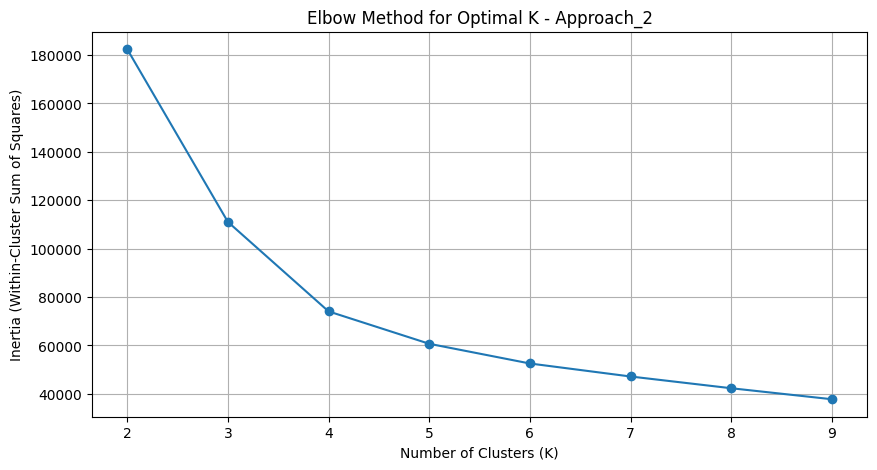

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

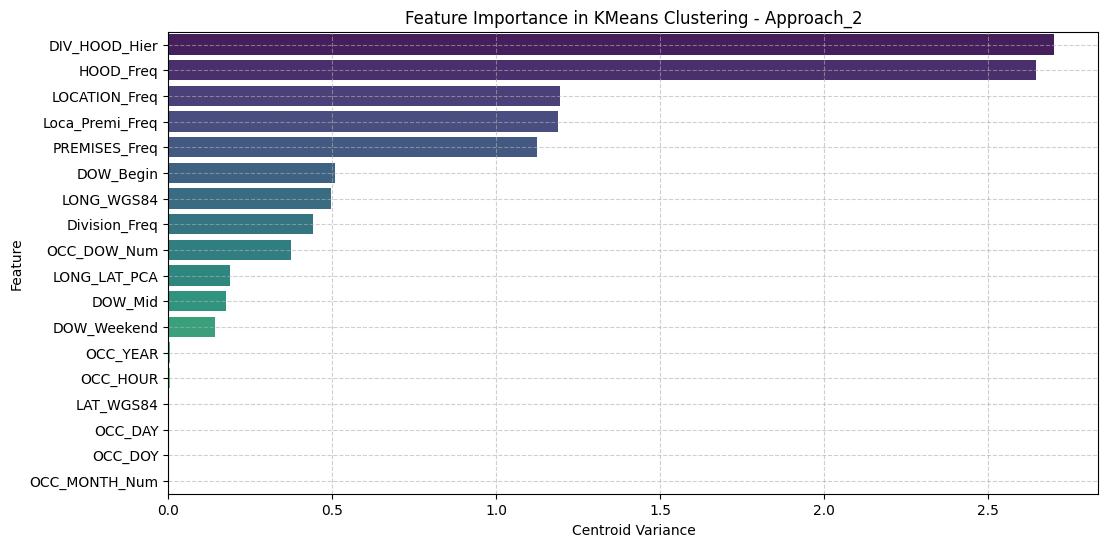

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

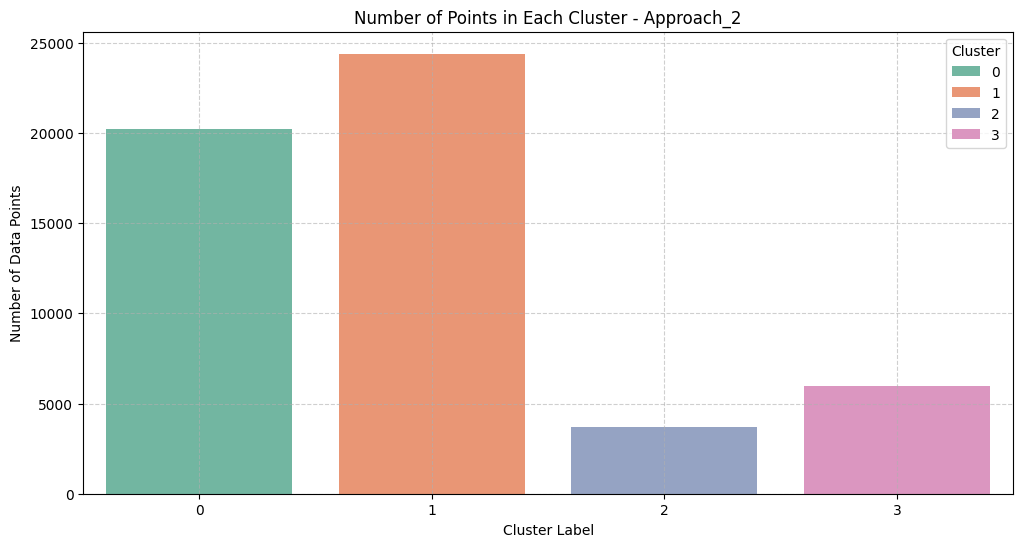

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import warnings, time, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import display, HTML
from google.colab import files

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

                                                                                  # Step 1: Upload and Read Data
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FE_Encoded_New.csv"
df = pd.read_csv(url)
display(HTML("<p style='color: green; font-size:16px; font-weight:bold;'>Data loaded successfully from FE_Encoded_New.csv.</p>"))

                                                                                  # Step 2: Generate All Valid Feature Combinations
                                                                                  # Base features (always included)
base_features = ["OCC_YEAR", "OCC_DAY", "OCC_DOY", "OCC_MONTH_Num", "OCC_HOUR"]
                                                                                  # Group 1: Temporal Features
group1 = ["OCC_DOW_Num", "DOW_Weekend", "DOW_Begin", "DOW_Mid"]
                                                                                  # Group 2: Spatial Features
group2 = ["LONG_LAT_PCA", "LONG_WGS84", "LAT_WGS84"]
                                                                                  # Group 3
group3 = [ "Division_Freq", "HOOD_Freq", "DIV_HOOD_Hier"]
                                                                                  # Group 4
group4 = [ "LOCATION_Freq", "PREMISES_Freq", "Loca_Premi_Freq"]
features = base_features + group1 + group2 + group3 + group4  # Final feature set

                                                                                  # Step 3: Build pipeline, Standardize data and perform KMeans
scaler = StandardScaler()
preprocessor = ColumnTransformer([('num', scaler, features)])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42, n_init=10))
])
                                                                                  # Fit pipeline on the dataset
pipeline.fit(df)
df_processed = pipeline.transform(df)
                                                                                  # Extract the fitted KMeans model and assign cluster labels to the dataframe
kmeans = pipeline.named_steps['kmeans']
df['Cluster'] = kmeans.labels_

                                                                                  # Step 4: Compute Clustering Metrics and Feature Importance
                                                                                  # Clustering metrics
sil_score = silhouette_score(df_processed, kmeans.labels_)
db_index = davies_bouldin_score(df_processed, kmeans.labels_)
ch_index = calinski_harabasz_score(df_processed, kmeans.labels_)
inertia_value = kmeans.inertia_
                                                                                  # Compute centroid variance for each feature as a proxy for feature importance
centroids = kmeans.cluster_centers_
centroid_variance = np.var(centroids, axis=0)
importance_df = pd.DataFrame({
    'Feature': features,
    'Centroid Variance': centroid_variance
}).sort_values(by='Centroid Variance', ascending=False)
                                                                                  # Step 5: Plot the K-Elbow Curve (for K values 2 to 9)
inertia_values = []
K_range = range(2, 10)
for k in K_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(df_processed)
    inertia_values.append(kmeans_test.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K - Approach_2")
plt.grid(True)
plt.savefig("K-Elbow - Approach_2.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("K-Elbow - Approach_2.png")
display(HTML("<br><br>"))
                                                                                  # Additional Output: Inertia Values for K-Elbow
inertia_html = """
<p style="color: darkblue; font-size: 18px; font-weight: bold;">
    Inertia values for different K:
"""
for k, inertia in zip(K_range, inertia_values):
    inertia_html += f"<br>For K = <span style='color: blue;'>{k}</span>: <span style='color: blue;'>{inertia:.2f}</span>"
inertia_html += "</p>"
display(HTML(inertia_html))
display(HTML("<br><br>"))
                                                                                  # Step 6: Plot K-Means Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Centroid Variance', y='Feature', palette='viridis')
plt.xlabel("Centroid Variance")
plt.ylabel("Feature")
plt.title("Feature Importance in KMeans Clustering - Approach_2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("K-Means_Feature_Importance - Approach_2.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("K-Means_Feature_Importance - Approach_2.png")
display(HTML("<br><br>"))
                                                                                  # Step 7: Plot Cluster Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Cluster', hue='Cluster', palette="Set2", dodge=False)
plt.title("Number of Points in Each Cluster - Approach_2")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("K-Means_Cluster_Distribution - Approach_2.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("K-Means_Cluster_Distribution - Approach_2.png")
display(HTML("<br><br>"))
                                                                                  # Additional Output: Cluster Distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_html = """
<p style="color: darkblue; font-size: 18px; font-weight: bold;">
    Number of data points in each cluster:
"""
for cluster, count in cluster_counts.items():
    cluster_html += f"<br><span style='color: blue;'>Cluster {cluster}</span>: <span style='color: green;'>{count}</span> data points"
cluster_html += "</p>"
display(HTML(cluster_html))
display(HTML("<br><br>"))
                                                                                  # Step 8: Build HTML Table for Clustering Analysis Summary
html_table = f"""
<table style='border-collapse: collapse; font-size: 18px; width: 100%; max-width: 900px; table-layout: fixed;'>
    <thead>
        <tr style='background-color: #2f4f4f; color: white;'>
            <th colspan="3" style="text-align: center; font-size: 24px; padding: 8px;">
                KMEANS Clustering Analysis - Approach_2
            </th>
        </tr>
        <tr>
            <td colspan="3" style="border: 1px solid #dddddd; padding: 8px; text-align: center;">
                Based on the K-Elbow method, KMeans was performed with 4 clusters. The clustering metrics are:
                <strong>Silhouette Score:</strong> {sil_score:.2f},
                <strong>Davies-Bouldin Index:</strong> {db_index:.2f},
                <strong>Calinski-Harabasz Index:</strong> {ch_index:.2f}, and
                <strong>Inertia:</strong> {inertia_value:.2f}.
            </td>
        </tr>
        <tr style='background-color: #4CAF50; color: white;'>
            <th style='border: 1px solid #dddddd; padding: 8px;'>S/N</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Feature</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Centroid Variance</th>
        </tr>
    </thead>
    <tbody>
"""
for idx, row in enumerate(importance_df.itertuples(), start=1):
    html_table += f"""
        <tr style='border: 1px solid #dddddd;'>
            <td style='border: 1px solid #dddddd; padding: 8px; text-align: center;'>{idx}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{row.Feature}</td>
            <td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{row[2]:.4f}</td>
        </tr>
    """
html_table += """
    </tbody>
</table>
"""
display(HTML(html_table))

# Step 9: Save the Updated Dataset with Cluster Labels
df.to_csv("FE_Encoded_New_with_Clusters.csv", index=False)
files.download("FE_Encoded_New_with_Clusters.csv")
display(HTML("""
    <p style="color: darkblue; font-size: 18px; font-weight: bold;">
         Updated dataset with cluster labels saved as <span style="color: green; font-weight: bold;">FE_Encoded_New_with_Clusters.csv</span>.
    </p>
"""))


### **5.6 Creating Combinations of different features - Approach_2**

In [6]:
import os
import warnings
import itertools
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from google.colab import files                                                    # For automatic file download in Colab

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
                                                                                  # Helper function to split a list into chunks of given size
def chunk_list(lst, chunk_size):
    """Yield successive chunk_size-sized chunks from lst."""
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]
                                                                                  # Generate Feature Combinations
base_features = ["OCC_YEAR", "OCC_DAY", "OCC_DOY", "OCC_MONTH_Num", "OCC_HOUR"]
group1_options = [
    ["OCC_DOW_Num"],
    ["DOW_Weekend", "DOW_Begin", "DOW_Mid"]
]
group2_options = [
    ["LONG_LAT_PCA"],
    ["LONG_WGS84", "LAT_WGS84"]
]
group3_options = [
    ["Division_Freq"],
    ["HOOD_Freq"],
    ["DIV_HOOD_Hier"]
]
group4_options = [
    ["LOCATION_Freq"],
    ["PREMISES_Freq"],
    ["Loca_Premi_Freq"]
]
all_combinations = []
for r in range(len(base_features) + 1):
    for base_subset in itertools.combinations(base_features, r):
        base_list = list(base_subset)
        for g1 in ([None] + group1_options):
            for g2 in ([None] + group2_options):
                for g3 in ([None] + group3_options):
                    for g4 in ([None] + group4_options):
                        current_set = base_list.copy()
                        if g1 is not None:
                            current_set += g1
                        if g2 is not None:
                            current_set += g2
                        if g3 is not None:
                            current_set += g3
                        if g4 is not None:
                            current_set += g4
                                                                                  # Remove duplicates while preserving order
                        current_set = list(dict.fromkeys(current_set))
                        if len(current_set) >= 4:
                            all_combinations.append(current_set)
                                                                                  # Create a DataFrame with an additional set_number column
feature_df = pd.DataFrame({
    "set_number": range(1, len(all_combinations)+1),
    "features": all_combinations
})
all_combos_filename = "Feature_Combo_All_with_set_number.csv"
feature_df.to_csv(all_combos_filename, index=False)
print(f"Saved all feature combinations to '{all_combos_filename}'. Total sets: {len(all_combinations)}")
                                                                                  # Split into chunks of 143 sets (as before)
chunk_size = 143
chunks = list(chunk_list(all_combinations, chunk_size))
total_chunks = len(chunks)
print(f"Total number of chunks (143 sets each): {total_chunks}")
files.download(all_combos_filename)

Saved all feature combinations to 'Feature_Combo_All_with_set_number.csv'. Total sets: 4284
Total number of chunks (143 sets each): 30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **5.6.1 DBSCAN EPS + Min Sample Tuning: Stage 1 - Coarse Tuning**
### **wider jumps of eps and min sample - APPROACH_2**

In [7]:
                                                                                  # Parallel Processing Setup: Process 5 chunks per run
start_chunk = 26                                                                  # Set these variables for each run. Edit as needed (1-indexed)
num_chunks_to_process = 5
end_chunk = start_chunk + num_chunks_to_process - 1

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Feature_Combo_All_with_set_number.csv"
feature_df = pd.read_csv(url)                                                     # Load all combinations from URL

import math                                                                       # Split the list of feature sets into chunks of 143 sets.
all_combinations = feature_df['features'].apply(eval).tolist()                    # Convert string repr back to list
chunk_size = 143
chunks = [all_combinations[i:i + chunk_size] for i in range(0, len(all_combinations), chunk_size)]
total_chunks = len(chunks)

if start_chunk < 1 or start_chunk > total_chunks:
    raise ValueError("start_chunk must be between 1 and total number of chunks")
if end_chunk > total_chunks:
    end_chunk = total_chunks

print(f"Processing chunks from {start_chunk} to {end_chunk} (each with 143 sets)")

url1 = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FE_Encoded_New.csv" # Load the Dataset (10% sample)
data = pd.read_csv(url1)
data = data.sample(frac=0.1, random_state=42)

import numpy as np                                                                # STAGE 1 - Coarse Tuning for Selected Chunks
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from google.colab import files

eps_values_coarse = np.array([1, 2, 3, 4, 5])
min_samples_values_coarse = [5, 10, 15]

for chunk_index in range(start_chunk, end_chunk+1):                               # Process each chunk in the specified range.
    chunk = chunks[chunk_index - 1]                                               # converting 1-indexed to 0-indexed
    results = []
    for local_set_number, feature_set in enumerate(chunk, start=1):               # Process each set in the current chunk.
        global_set_number = (chunk_index - 1) * chunk_size + local_set_number     # Compute global set_number for clarity.

        missing_features = [feat for feat in feature_set if feat not in data.columns]
        if missing_features:                                                      # If features are missing, record a row with Nones.
            results.append({
                "set_number": global_set_number,
                "features": feature_set,
                "best_eps": None,
                "best_min_samples": None,
                "best_silhouette_score": None,
                "top10_eps": None,
                "top10_min_samples": None,
                "top10_eps_min": None,
                "top10_eps_max": None,
                "top10_min_samples_min": None,
                "top10_min_samples_max": None
            })
            print(f"Set {global_set_number} evaluated. Missing features: {missing_features}")
            continue

        df_subset = data[feature_set]
        scaler = StandardScaler()
        df_subset = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)

        score_list = []
        for eps in eps_values_coarse:
            for min_samples in min_samples_values_coarse:
                try:
                    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                    labels = dbscan.fit_predict(df_subset)                        # Only consider valid clustering results (at least 2 clusters and some non-noise labels)
                    if len(set(labels)) > 1 and any(label != -1 for label in labels):
                        score = silhouette_score(df_subset, labels)
                        score_list.append((score, eps, min_samples))
                except Exception:
                    continue

        if score_list:
            score_list.sort(key=lambda x: x[0], reverse=True)
            top_10 = score_list[:10]
            top10_eps = [entry[1] for entry in top_10]
            top10_min_samples = [entry[2] for entry in top_10]
            eps_range = (min(top10_eps), max(top10_eps))
            min_samples_range = (min(top10_min_samples), max(top10_min_samples))
            best_score, best_eps, best_min_samples = top_10[0]

            results.append({
                "set_number": global_set_number,
                "features": feature_set,
                "best_eps": best_eps,
                "best_min_samples": best_min_samples,
                "best_silhouette_score": best_score,
                "top10_eps": str(top10_eps),
                "top10_min_samples": str(top10_min_samples),
                "top10_eps_min": eps_range[0],
                "top10_eps_max": eps_range[1],
                "top10_min_samples_min": min_samples_range[0],
                "top10_min_samples_max": min_samples_range[1]
            })
            print(f"Set {global_set_number} evaluated. Best: (eps: {best_eps}, min_samples: {best_min_samples}), Score: {best_score:.4f}")
        else:
            results.append({
                "set_number": global_set_number,
                "features": feature_set,
                "best_eps": None,
                "best_min_samples": None,
                "best_silhouette_score": None,
                "top10_eps": None,
                "top10_min_samples": None,
                "top10_eps_min": None,
                "top10_eps_max": None,
                "top10_min_samples_min": None,
                "top10_min_samples_max": None
            })
            print(f"Set {global_set_number} evaluated. No valid clustering found.")

    results_df = pd.DataFrame(results)                                            # Save results for the current chunk.
    output_filename = f"DBSCAN_Coarse_Top10_chunk_{chunk_index}.csv"
    results_df.to_csv(output_filename, index=False)
    print(f"Chunk {chunk_index} processed and saved to '{output_filename}'.")
    files.download(output_filename)


Processing chunks from 26 to 30 (each with 143 sets)
Set 3576 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3559
Set 3577 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.4278
Set 3578 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3864
Set 3579 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3861
Set 3580 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3614
Set 3581 evaluated. Best: (eps: 1, min_samples: 10), Score: 0.2094
Set 3582 evaluated. Best: (eps: 1, min_samples: 10), Score: 0.0189
Set 3583 evaluated. Best: (eps: 1, min_samples: 15), Score: 0.0256
Set 3584 evaluated. Best: (eps: 1, min_samples: 15), Score: 0.0233
Set 3585 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.1400
Set 3586 evaluated. Best: (eps: 1, min_samples: 15), Score: -0.0169
Set 3587 evaluated. Best: (eps: 1, min_samples: 5), Score: -0.0925
Set 3588 evaluated. Best: (eps: 1, min_samples: 10), Score: -0.1536
Set 3589 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3803
Set 3590 evalu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Set 3719 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3807
Set 3720 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3557
Set 3721 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.4276
Set 3722 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3861
Set 3723 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3859
Set 3724 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3611
Set 3725 evaluated. Best: (eps: 1, min_samples: 10), Score: 0.2074
Set 3726 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0481
Set 3727 evaluated. Best: (eps: 1, min_samples: 15), Score: 0.0249
Set 3728 evaluated. Best: (eps: 1, min_samples: 10), Score: 0.0433
Set 3729 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.1407
Set 3730 evaluated. Best: (eps: 1, min_samples: 15), Score: -0.1000
Set 3731 evaluated. Best: (eps: 1, min_samples: 5), Score: -0.0749
Set 3732 evaluated. Best: (eps: 1, min_samples: 5), Score: -0.1423
Set 3733 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3800
Set

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Set 3862 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3892
Set 3863 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3888
Set 3864 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3912
Set 3865 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.4393
Set 3866 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3944
Set 3867 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3940
Set 3868 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3963
Set 3869 evaluated. Best: (eps: 1, min_samples: 15), Score: 0.3079
Set 3870 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0863
Set 3871 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0907
Set 3872 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0875
Set 3873 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.1593
Set 3874 evaluated. Best: (eps: 1, min_samples: 10), Score: -0.0234
Set 3875 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0201
Set 3876 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0399
Set 387

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Set 4005 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.4320
Set 4006 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3880
Set 4007 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3876
Set 4008 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3899
Set 4009 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.4377
Set 4010 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3933
Set 4011 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3928
Set 4012 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3951
Set 4013 evaluated. No valid clustering found.
Set 4014 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0852
Set 4015 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0901
Set 4016 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.0820
Set 4017 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.1175
Set 4018 evaluated. Best: (eps: 1, min_samples: 15), Score: 0.0141
Set 4019 evaluated. Best: (eps: 1, min_samples: 10), Score: 0.0224
Set 4020 evaluated. Best: (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Set 4148 evaluated. Best: (eps: 1, min_samples: 10), Score: -0.0781
Set 4149 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3836
Set 4150 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3490
Set 4151 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3489
Set 4152 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3245
Set 4153 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3889
Set 4154 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3539
Set 4155 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3538
Set 4156 evaluated. Best: (eps: 2, min_samples: 5), Score: 0.3297
Set 4157 evaluated. Best: (eps: 1, min_samples: 5), Score: 0.1876
Set 4158 evaluated. Best: (eps: 1, min_samples: 5), Score: -0.1126
Set 4159 evaluated. Best: (eps: 1, min_samples: 5), Score: -0.0788
Set 4160 evaluated. Best: (eps: 1, min_samples: 15), Score: -0.0716
Set 4161 evaluated. Best: (eps: 1, min_samples: 10), Score: 0.0270
Set 4162 evaluated. Best: (eps: 1, min_samples: 15), Score: -0.1677
S

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **5.6.2 DBSCAN EPS + Min Sample Tuning: Stage 2 - Intermediate Tuning**
### **Narrower jumps of eps and min sample based on Stage 1 - APPROACH_2**

In [ ]:
import warnings
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from google.colab import files
from IPython.display import display, HTML

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FE_Encoded_New.csv" # URL of the dataset
data = pd.read_csv(url)                                                           # Read the dataset from URL
data = data.sample(frac=0.1, random_state=42)                                     # 10% Sample from the Dataset

                                                                                  # Set the range of chunks to process
start_chunk = 29                                                                  # Beginning value of Range
end_chunk = 30                                                                    # End Value of Range

expected_filenames = [f"DBSCAN_Coarse_Top10_chunk_{i}.csv" for i in range(start_chunk, end_chunk + 1)]

                                                                                  # Display upload prompt
html_output = f"""
<p>Please upload the following coarse tuning CSV files:</p>
<ul>
{''.join([f'<li><strong>{fname}</strong></li>' for fname in expected_filenames])}
</ul>
<p>No file chosen Cancel upload</p>
"""
display(HTML(html_output))

uploaded_files = files.upload()
missing_files = [fname for fname in expected_filenames if fname not in uploaded_files]  # Ensure all expected files are uploaded
if missing_files:
    print(f"Error: The following expected files were not uploaded: {missing_files}")
else:
    print("All files successfully uploaded. Processing...")

for expected_filename in expected_filenames:
    if expected_filename not in uploaded_files:
        continue

    coarse_df = pd.read_csv(expected_filename)
    intermediate_results = []
    for idx, row in coarse_df.iterrows():
        set_number = row["set_number"]
        feature_set = eval(row["features"])
        if pd.isnull(row["best_eps"]) or pd.isnull(row["best_min_samples"]):
            continue
        best_eps_coarse = row["best_eps"]
        best_min_samples_coarse = row["best_min_samples"]

        eps_grid = np.arange(best_eps_coarse - 0.5, best_eps_coarse + 0.5 + 0.1, 0.1) # Narrower eps jumps
        min_samples_grid = list(range(int(best_min_samples_coarse) - 2, int(best_min_samples_coarse) + 2 + 1))  # Narrower min sample jumps

        missing_features = [feat for feat in feature_set if feat not in data.columns]
        if missing_features:
            continue

        df_subset = data[feature_set]
        df_subset = pd.DataFrame(StandardScaler().fit_transform(df_subset), columns=df_subset.columns)

        score_list = []
        for eps in eps_grid:
            for min_samples in min_samples_grid:
                try:
                    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                    labels = dbscan.fit_predict(df_subset)
                    if len(set(labels)) > 1 and any(label != -1 for label in labels):
                        score = silhouette_score(df_subset, labels)
                        score_list.append((score, eps, min_samples))
                except Exception:
                    continue

        if score_list:
            score_list.sort(key=lambda x: x[0], reverse=True)
            top_10 = score_list[:10]
            top10_eps = [entry[1] for entry in top_10]
            top10_min_samples = [entry[2] for entry in top_10]
            eps_range = (min(top10_eps), max(top10_eps))
            min_samples_range = (min(top10_min_samples), max(top10_min_samples))
            best_score, best_eps, best_min_samples = top_10[0]
            intermediate_results.append({
                "set_number": set_number,
                "features": feature_set,
                "best_eps": best_eps,
                "best_min_samples": best_min_samples,
                "best_silhouette_score": best_score,
                "top10_eps": str(top10_eps),
                "top10_min_samples": str(top10_min_samples),
                "top10_eps_min": eps_range[0],
                "top10_eps_max": eps_range[1],
                "top10_min_samples_min": min_samples_range[0],
                "top10_min_samples_max": min_samples_range[1]
            })
            print(f"Intermediate tuning: Set {set_number} processed. Best: (eps: {best_eps}, min_samples: {best_min_samples}), Score: {best_score:.4f}")
        else:
            intermediate_results.append({
                "set_number": set_number,
                "features": feature_set,
                "best_eps": None,
                "best_min_samples": None,
                "best_silhouette_score": None,
                "top10_eps": None,
                "top10_min_samples": None,
                "top10_eps_min": None,
                "top10_eps_max": None,
                "top10_min_samples_min": None,
                "top10_min_samples_max": None
            })
            print(f"Intermediate tuning: Set {set_number} processed. No valid clustering found.")

    intermediate_df = pd.DataFrame(intermediate_results)
    output_filename = expected_filename.replace("Coarse_Top10", "Intermediate_Top10")
    intermediate_df.to_csv(output_filename, index=False)
    print(f"\nIntermediate tuning for '{expected_filename}' complete. Results saved to '{output_filename}'.")
    files.download(output_filename)

### **5.6.3 DBSCAN EPS + Min Sample Tuning: Stage 3 - Final Tuning**
### **Narrowest jumps of eps and min sample based on Stage 2 - APPROACH_2**

In [ ]:
import warnings
import os
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from google.colab import files

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FE_Encoded_New.csv" # URL of the dataset
data = pd.read_csv(url)                                                           # Read the dataset from URL
data = data.sample(frac=0.1, random_state=42)                                     # 10% Sample from the Dataset

                                                                                  # Set the range of chunks to process
start_chunk = 29                                                                  # Beginning value of Range
end_chunk = 30                                                                    # End Value of Range

expected_filenames = [f"DBSCAN_Intermediate_Top10_chunk_{i}.csv" for i in range(start_chunk, end_chunk + 1)]

                                                                                  # Check for missing files in the Colab environment
missing_files = [fname for fname in expected_filenames if not os.path.exists(fname)]
if missing_files:
    print(f"Error: The following expected files were not found: {missing_files}")
else:
    print("All expected files found. Processing...")

for expected_filename in expected_filenames:
    if not os.path.exists(expected_filename):
        continue

    intermediate_df = pd.read_csv(expected_filename)
    final_results = []

    for idx, row in intermediate_df.iterrows():
        set_number = row["set_number"]
        feature_set = eval(row["features"])
        if pd.isnull(row["best_eps"]) or pd.isnull(row["best_min_samples"]):
            continue

        top10_eps_list = eval(row["top10_eps"])
        top10_min_samples_list = eval(row["top10_min_samples"])

        eps_min, eps_max = min(top10_eps_list), max(top10_eps_list)
        eps_grid_fine = np.arange(eps_min, eps_max + 0.1, 0.1)

        ms_min, ms_max = min(top10_min_samples_list), max(top10_min_samples_list)
        min_samples_grid_fine = list(range(int(ms_min), int(ms_max) + 1))

        missing_features = [feat for feat in feature_set if feat not in data.columns]
        if missing_features:
            continue

        df_subset = data[feature_set]
        df_subset = pd.DataFrame(StandardScaler().fit_transform(df_subset), columns=df_subset.columns)

        score_list = []
        for eps in eps_grid_fine:
            for min_samples in min_samples_grid_fine:
                try:
                    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                    labels = dbscan.fit_predict(df_subset)
                    if len(set(labels)) > 1 and any(label != -1 for label in labels):
                        score = silhouette_score(df_subset, labels)
                        score_list.append((score, eps, min_samples))
                except Exception:
                    continue

        if score_list:
            score_list.sort(key=lambda x: x[0], reverse=True)
            best_score, best_eps, best_min_samples = score_list[0]
            final_results.append({
                "set_number": set_number,
                "features": feature_set,
                "best_eps": best_eps,
                "best_min_samples": best_min_samples,
                "best_silhouette_score": best_score
            })
            print(f"Fine tuning: Set {set_number} processed. Best: (eps: {best_eps}, min_samples: {best_min_samples}), Score: {best_score:.4f}")
        else:
            final_results.append({
                "set_number": set_number,
                "features": feature_set,
                "best_eps": None,
                "best_min_samples": None,
                "best_silhouette_score": None
            })
            print(f"Fine tuning: Set {set_number} processed. No valid clustering found.")

    final_df = pd.DataFrame(final_results)
    output_filename = expected_filename.replace("Intermediate_Top10", "Best_Fine_Params")
    final_df.to_csv(output_filename, index=False)
    print(f"\nFine tuning for '{expected_filename}' complete. Final best parameters saved to '{output_filename}'.")

    files.download(output_filename)                                               # Download the dataframe as csv file


### **5.6.4 Merging Best eps and min samples from stage 3 - Approach_2**

In [ ]:
import pandas as pd
from google.colab import files
from IPython.display import display, HTML

base_url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/DBSCAN_Best_Fine_Params_chunk_{}.csv" # Base URL of all files containing Fine Tuned values of eps and min_sample .
dfs = []                                                                          # List to hold dataframes
for i in range(1, 31):                                                            # Loop through file numbers 1 to 30
    url = base_url.format(i)
    print(f"Reading file: {url}")
    try:
        df = pd.read_csv(url)
        dfs.append(df)
    except Exception as e:
        print(f"Error reading file {url}: {e}")
                                                                                  # Merge all dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)
                                                                                  # Save the merged file locally
output_filename = 'Feature_Combos__Freq_New.csv'
merged_df.to_csv(output_filename, index=False)
                                                                                  # Display a formatted success message
display(HTML(f"""
    <p style="color: darkblue; font-size: 18px; font-weight: bold;">
         Merged dataset saved as <span style="color: green; font-weight: bold;">{output_filename}</span>.
    </p>
"""))
files.download(output_filename)                                                   # Download the merged file

### **5.6.5 Approach_2 Iterations to find eps and minsample**

### **5.7 Clustering Model Training - Approach_2**

In [ ]:
import warnings
import ast
import numpy as np
import pandas as pd
import time
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from google.colab import files

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings
combos_url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Feature_Combos__Freq_New.csv"  # URL of the csv file with all Combinations of Features
combos_df = pd.read_csv(combos_url)                                               # Read ALL feature combinations from URL
                                                                                  # Display message that feature sets have been read
display(HTML("<p style='color: green; font-size:16px;'><b>Feature combination specifications loaded from 'Feature_Combos__Freq_New.csv'</b></p>"))
                                                                                  # Read the dataset from the new URL
data_url = "https://raw.githubusercontent.com/mohammadbadiCrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FE_Encoded_New.csv"
data = pd.read_csv(data_url)
sample_data = data.sample(frac=0.1, random_state=42)                              # Sample 10% of the data for clustering
results = {}                                                                      # Track results - to store clustering metrics for each feature set
total_models = 0

def color_silhouette(value):
    """Color code Silhouette Score (higher is better)"""
    if value >= 0.6:
        color = "#32cd32"                                                         # green
    elif value >= 0.3:
        color = "#ffcc00"                                                         # yellow
    else:
        color = "#ff6347"                                                         # red
    return f"<span style='color: {color}; font-weight: bold;'>{value:.2f}</span>"

def color_dbi(value):
    """Color code Davies-Bouldin Index (lower is better)"""
    if value <= 1.0:
        color = "#32cd32"                                                         # green
    elif value <= 1.5:
        color = "#ffcc00"                                                         # yellow
    else:
        color = "#ff6347"                                                         # red
    return f"<span style='color: {color}; font-weight: bold;'>{value:.2f}</span>"

def color_accuracy(value):
    """Color code prediction accuracy: below 50% red, 50.1%+ green"""
    if value < 50.1:
        color = "#ff6347"                                                         # red
    else:
        color = "#32cd32"                                                         # green
    return f"<span style='color: {color}; font-weight: bold;'>{value:.2f}%</span>"
                                                                                  # Iterate through each feature set from the combination file
for idx, row in combos_df.iterrows():
    total_models += 1
    set_number = row['set_number']
                                                                                  # Convert the string representation of features into an actual list
    feature_set = ast.literal_eval(row['features'])
                                                                                  # Round best_eps to one decimal place
    best_eps = round(row['best_eps'], 1)
    best_min_samples = row['best_min_samples']

    valid_features = [f for f in feature_set if f in sample_data.columns]         # Ensure features exist in the dataset
    if len(valid_features) != len(feature_set):
        print(f"Warning: Some features in {feature_set} are missing. Using only: {valid_features}")

    data_for_clustering = sample_data[valid_features]
    numerical_cols = data_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Standardize numerical columns
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_for_clustering[numerical_cols]), columns=numerical_cols)
    categorical_cols = [col for col in valid_features if col not in numerical_cols]  # Append any categorical columns
    if categorical_cols:
        data_scaled = pd.concat([data_scaled, data_for_clustering[categorical_cols]], axis=1)
                                                                                  # Perform KMeans clustering with n_clusters=4
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
                                                                                  # Perform DBSCAN clustering with eps and min_samples from the feature combo file
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan_labels = dbscan.fit_predict(data_scaled)
                                                                                  # Calculate clustering metrics for KMeans
    silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
    dbi_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
    ch_kmeans = calinski_harabasz_score(data_scaled, kmeans_labels)
    kmeans_accuracy = max(0, silhouette_kmeans) * 100
                                                                                  # Calculate clustering metrics for DBSCAN (if possible)
    silhouette_dbscan = -1 if len(set(dbscan_labels)) <= 1 else silhouette_score(data_scaled, dbscan_labels)
    dbi_dbscan = -1 if len(set(dbscan_labels)) <= 1 else davies_bouldin_score(data_scaled, dbscan_labels)
    dbscan_accuracy = max(0, silhouette_dbscan) * 100

    num_features = len(valid_features)
    formatted_features = [f"'{feature}'" for feature in valid_features]
    feature_names_string = f"[{', '.join(formatted_features)}]"

    results[tuple(valid_features)] = {
        'Set Number': set_number,
        'Number of Features': num_features,
        'Features': feature_names_string,
        'KMeans Silhouette Score': silhouette_kmeans,
        'KMeans Davies-Bouldin Index': dbi_kmeans,
        'KMeans Calinski-Harabasz Score': ch_kmeans,
        'KMeans Prediction Accuracy': kmeans_accuracy,
        'DBSCAN Silhouette Score': silhouette_dbscan,
        'DBSCAN Davies-Bouldin Index': dbi_dbscan,
        'DBSCAN Prediction Accuracy': dbscan_accuracy,
        'Best eps': best_eps,
        'Best min_samples': best_min_samples
    }
                                                                                  # Create HTML table output for the current result
    results_html = f"""
    <div style="margin: 10px auto; width: 80%; border: 2px solid #ddd; padding: 10px; background-color: #f9f9f9;">
      <table style="width: 100%; border-collapse: collapse; text-align: center;">
        <tr>
          <th colspan="3" style="font-size: 14px; padding: 10px; text-align: left;">Result of Set {set_number}</th>
        </tr>
        <tr>
          <th colspan="3" style="font-size: 13px; padding: 5px; text-align: left;">Number of Features: {num_features} &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; Features in this model: {feature_names_string}</th>
        </tr>
        <tr style="background-color: #e0e0e0; font-weight: bold;">
          <td style="padding: 8px; border: 1px solid #ddd;">Statistic</td>
          <td style="padding: 8px; border: 1px solid #ddd;">KMeans</td>
          <td style="padding: 8px; border: 1px solid #ddd;">
            DBSCAN<br>
            <span style="font-size: small;">(eps: {best_eps:.1f}, min_samples: {best_min_samples})</span>
          </td>
        </tr>
        <tr>
          <td style="padding: 8px; border: 1px solid #ddd;">Silhouette Score</td>
          <td style="padding: 8px; border: 1px solid #ddd;">{color_silhouette(silhouette_kmeans)}</td>
          <td style="padding: 8px; border: 1px solid #ddd;">{"N/A" if silhouette_dbscan == -1 else color_silhouette(silhouette_dbscan)}</td>
        </tr>
        <tr>
          <td style="padding: 8px; border: 1px solid #ddd;">Davies-Bouldin Index</td>
          <td style="padding: 8px; border: 1px solid #ddd;">{color_dbi(dbi_kmeans)}</td>
          <td style="padding: 8px; border: 1px solid #ddd;">{"N/A" if dbi_dbscan == -1 else color_dbi(dbi_dbscan)}</td>
        </tr>
        <tr>
          <td style="padding: 8px; border: 1px solid #ddd;">Calinski-Harabasz Score</td>
          <td style="padding: 8px; border: 1px solid #ddd;">{round(ch_kmeans,2)}</td>
          <td style="padding: 8px; border: 1px solid #ddd;">-</td>
        </tr>
        <tr style="font-weight: bold;">
          <td style="padding: 8px; border: 1px solid #ddd;">Prediction Accuracy</td>
          <td style="padding: 8px; border: 1px solid #ddd;">{color_accuracy(kmeans_accuracy)}</td>
          <td style="padding: 8px; border: 1px solid #ddd;">{color_accuracy(dbscan_accuracy)}</td>
        </tr>
      </table>
    </div>
    """
    display(HTML(results_html))
    time.sleep(0.1)

results_df = pd.DataFrame(results.values())
results_df.to_csv('Feature_Combo_New_Results.csv', index=False)
files.download('Feature_Combo_New_Results.csv')
                                                                                  # Display formatted message for saved file
display(HTML("""
    <p style="color: darkblue; font-size: 18px; font-weight: bold;">
         Results have been saved as <span style="color: green;">Feature_Combo_New_Results.csv</span>.
    </p>
"""))
display(HTML(f"<h2 style='color: navy; font-size:18px;'><b>Total K-Means & DBSCAN Clustering Models Trained: {total_models}</b></h2>"))
print("\n\n")
display(HTML(f"""
<div style="font-family: Arial, sans-serif; font-size: 18px; padding: 15px; border-radius: 10px;
             background: #282c34; color: #61dafb; text-align: center; width: 60%; margin: 20px auto;
             box-shadow: 2px 2px 10px rgba(0,0,0,0.2);">
    <strong>Total K-Means & DBSCAN Clustering models trained:</strong>
    <span style="color: #ffcc00; font-size: 22px;">{total_models}</span>
</div>
"""))

### **Summary Table of Clustering Models - Approach_2**

In [ ]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
import asyncio
!pip install dataframe_image -qqq
import dataframe_image as dfi
from IPython.display import display, HTML
from google.colab import files

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Feature_Combo_New_Results.csv"  # Load feature combinations
data = pd.read_csv(url)

                                                                                  # Define the metrics
metrics_order = [
    'KMeans Silhouette Score',
    'KMeans Calinski-Harabasz Score',
    'KMeans Davies-Bouldin Index',
    'DBSCAN Silhouette Score',
    'DBSCAN Davies-Bouldin Index'
]

top_results = {}                                                                  # Initialize a dictionary to store top results and their counts
feature_set_summary = {}

for metric in metrics_order:                                                      # Iterate through the top 100 rows for each metric and store occurrences
    if metric in data.columns:
        if 'Davies-Bouldin' in metric:                                            # For Davies-Bouldin Index, we want the lowest values
            top_rows = data.nsmallest(100, metric)
        else:
            top_rows = data.nlargest(100, metric)
        top_results[metric] = top_rows                                            # Store top rows in a dictionary
        for _, row in top_rows.iterrows():                                        # Iterate through the top rows to count occurrences of Feature Sets and track where they were found
            feature_set = row['Features']                                         # Updated column name
            if feature_set not in feature_set_summary:
                feature_set_summary[feature_set] = {
                    'Count': 0,
                    'Found In': []
                }
            feature_set_summary[feature_set]['Count'] += 1
            feature_set_summary[feature_set]['Found In'].append(metric)

summary_df = pd.DataFrame.from_dict(feature_set_summary, orient='index')          # Create a summary of most repeated feature sets
summary_df.reset_index(inplace=True)
summary_df.columns = ['Features', 'Count', 'Found In']                            # Updated column name
summary_df.sort_values(by='Count', ascending=False, inplace=True)                 # Sort by Count in descending order

final_columns = ['Set Number', 'Features', 'Count'] + metrics_order               # Prepare the final metrics DataFrame
final_metrics_df = pd.DataFrame(columns=final_columns)
for index, row in summary_df.iterrows():
    feature_set_name = row['Features']
    metrics_row = data[data['Features'] == feature_set_name]
    if not metrics_row.empty:
        new_row = {
            'Set Number': metrics_row['Set Number'].values[0],                    # Fetch Set Number from CSV
            'Features': feature_set_name,
            'Count': row['Count']
        }
                                                                                  # Ensure the metrics are added in the desired order
        for metric in metrics_order:
            new_row[metric] = metrics_row[metric].values[0]

        if final_metrics_df.empty:
            final_metrics_df = pd.DataFrame([new_row])
        else:
            final_metrics_df = pd.concat([final_metrics_df, pd.DataFrame([new_row])], ignore_index=True)

final_metrics_df.sort_values(by='Count', ascending=False, inplace=True)
                                                                                  # Helper function to highlight the top 5 values correctly
def highlight_top5(s, ascending=True):
                                                                                  # Sort the series and drop NaNs
    sorted_vals = s.sort_values(ascending=ascending).dropna()
                                                                                  # Get the top 5 unique values
    top5_vals = sorted_vals.head(5).unique()
                                                                                  # Return styling only for values in top5_vals
    return ['background-color: lightgreen' if x in top5_vals else '' for x in s]
                                                                                  # Style the full metrics summary table (Approach_2)
styled_table = final_metrics_df.style.apply(lambda s: highlight_top5(s, ascending=False), subset=['KMeans Silhouette Score']) \
                                      .apply(lambda s: highlight_top5(s, ascending=False), subset=['KMeans Calinski-Harabasz Score']) \
                                      .apply(lambda s: highlight_top5(s, ascending=True), subset=['KMeans Davies-Bouldin Index']) \
                                      .apply(lambda s: highlight_top5(s, ascending=False), subset=['DBSCAN Silhouette Score']) \
                                      .apply(lambda s: highlight_top5(s, ascending=True), subset=['DBSCAN Davies-Bouldin Index']) \
                                      .format({metric: '{:.2f}' for metric in metrics_order}) \
                                      .set_table_styles([
                                          {'selector': 'th', 'props': [('background-color', '#4CAF50'),
                                                                       ('color', 'white'),
                                                                       ('font-weight', 'bold'),
                                                                       ('text-align', 'center'),
                                                                       ('border', '1px solid black')]},
                                          {'selector': 'td', 'props': [('padding', '10px'),
                                                                       ('text-align', 'center'),
                                                                       ('border', '1px solid black')]},
                                          {'selector': 'table', 'props': [('border-collapse', 'collapse')]}
                                      ]).set_properties(**{'border': '1px solid black'}) \
                                      .set_caption("<h3 style='color: navy; text-align: center;'>📊 Metrics Summary Table - Approach_2</h3>")
                                                                                  # Save the full table to Excel and PNG with updated filenames
styled_table.data.to_excel('metrics_summary_table_Approach_2.xlsx', index=False)
dfi.export(styled_table.data, 'metrics_summary_table_Approach_2.png', table_conversion='matplotlib', max_rows=-1)
files.download('metrics_summary_table_Approach_2.png')
files.download('metrics_summary_table_Approach_2.xlsx')
                                                                                  # Create an extra table displaying the top 7 models (sorted by Count)
top7_df = final_metrics_df.head(7).copy()
styled_top7 = top7_df.style.apply(lambda s: highlight_top5(s, ascending=False), subset=['KMeans Silhouette Score']) \
                              .apply(lambda s: highlight_top5(s, ascending=False), subset=['KMeans Calinski-Harabasz Score']) \
                              .apply(lambda s: highlight_top5(s, ascending=True), subset=['KMeans Davies-Bouldin Index']) \
                              .apply(lambda s: highlight_top5(s, ascending=False), subset=['DBSCAN Silhouette Score']) \
                              .apply(lambda s: highlight_top5(s, ascending=True), subset=['DBSCAN Davies-Bouldin Index']) \
                              .format({metric: '{:.2f}' for metric in metrics_order}) \
                              .set_table_styles([
                                  {'selector': 'th', 'props': [('background-color', '#4CAF50'),
                                                               ('color', 'white'),
                                                               ('font-weight', 'bold'),
                                                               ('text-align', 'center'),
                                                               ('border', '1px solid black')]},
                                  {'selector': 'td', 'props': [('padding', '10px'),
                                                               ('text-align', 'center'),
                                                               ('border', '1px solid black')]},
                                  {'selector': 'table', 'props': [('border-collapse', 'collapse')]}
                              ]).set_properties(**{'border': '1px solid black'}) \
                              .set_caption("<h3 style='color: navy; text-align: center;'>Top 7 Models in Approach_2</h3>")
display(styled_top7)
display(styled_table)
                                                                                  # Export the top models table as a PNG file and download it
dfi.export(styled_top7.data, 'Top 7 models in Approach_2.png', table_conversion='matplotlib', max_rows=-1)
files.download('Top 7 models in Approach_2.png')

display(HTML("""
    <p style="color: darkblue; font-size: 18px; font-weight: bold;">
         Metrics summary table has been saved to <span style="color: green;">'metrics_summary_table_Approach_2.xlsx'</span>
         and <span style="color: green;">'metrics_summary_table_Approach_2.png'</span>.
    </p>
"""))


### **5.9 Best Model Training - Approach_2**

In [ ]:
import warnings                                                                   # Import necessary libraries
import numpy as np
import pandas as pd
import ast                                                                        # For safely evaluating strings
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from google.colab import files

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings
                                                                                  # Read the datasets
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/FE_Encoded_New.csv"
url1 = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Feature_Combo_New_Results.csv"
original_data = pd.read_csv(url)
feature_combos = pd.read_csv(url1)

                                                                                  # Debugging: Check input files for missing values
html_output = """
<p style="color: black; font-size: 16px; font-weight: bold;">
    Checking input files...<br>
    Missing values in original_data: <span style="color: green;">{orig_missing}</span><br>
    Missing values in feature_combos: <span style="color: green;">{feat_missing}</span>
</p>
"""
display(HTML(html_output.format(orig_missing=original_data.isnull().sum().sum(), feat_missing=feature_combos.isnull().sum().sum())))

                                                                                  # Add an _id column to preserve original indexing
original_data['_id'] = original_data.index
sample_data = original_data.copy()
# sample_data = original_data.sample(frac=0.1, random_state=42)  # Uncomment to use a 10% sample for clustering

                                                                                  # Define feature sets using the new column names from feature_combos
set_names = ['34', '35', '36', '41', '45']                                        # Define the set numbers to match
feature_sets = []                                                                 # Initialize an empty list to store feature sets
for set_name in set_names:
                                                                                  # Use "Set Number" and "Features" columns from feature_combos
    matched_features = feature_combos[feature_combos['Set Number'] == int(set_name)]['Features']
    if not matched_features.empty:
        features_list = ast.literal_eval(matched_features.values[0])              # Convert string to list
        feature_sets.append(features_list)
    else:
        feature_sets.append([])                                                   # Handle missing feature sets
                                                                                  # Debugging: Check feature set validity
debug_feature = "<p style=\"color: black; font-size: 16px; font-weight: bold;\">Checking feature set validity.<br>"
for i, features in enumerate(feature_sets, start=1):
    valid_features = [f for f in features if f in sample_data.columns]
    debug_feature += f"<span style=\"color: darkblue;\">{set_names[i-1]}</span>: <span style=\"color: green;\">{len(valid_features)}</span> valid features out of <span style=\"color: green;\">{len(features)}</span><br>"
    if len(valid_features) == 0:
        debug_feature += f"Warning: Feature set <span style=\"color: darkblue;\">{set_names[i-1]}</span> has no valid features!<br>"
debug_feature += "</p>"
display(HTML(debug_feature))
                                                                                  # Debugging: Standardization Check for each feature set
debug_standard = "<p style=\"color: black; font-size: 16px; font-weight: bold;\">Standardization Checks:<br>"
for i, features in enumerate(feature_sets, start=1):
    valid_features = [f for f in features if f in sample_data.columns]
    if valid_features:
        data_for_clustering = sample_data[valid_features].copy()
        numerical_cols = data_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()
        if len(numerical_cols) == 0:
            debug_standard += f" Warning: Feature set <span style=\"color: darkblue;\">{set_names[i-1]}</span> has NO numerical columns for clustering!<br>"
        else:
            scaler = StandardScaler()
            try:
                scaler.fit_transform(data_for_clustering[numerical_cols])
                debug_standard += f" Scaling successful for <span style=\"color: darkblue;\">{set_names[i-1]}</span> (<span style=\"color: green;\">{len(numerical_cols)}</span> numerical features).<br>"
            except Exception as e:
                debug_standard += f" Error scaling <span style=\"color: darkblue;\">{set_names[i-1]}</span>: {e}<br>"
debug_standard += "</p>"
display(HTML(debug_standard))
                                                                                  # Debugging: Check _id mapping
sample_ids = sample_data['_id'].values                                            # Store _id for mapping
duplicated_ids = sample_data['_id'].duplicated().sum()
html_id = """
<p style="color: black; font-size: 16px; font-weight: bold;">
    Checking _id mapping...<br>
    Total unique IDs: <span style="color: green;">{unique}</span>, Duplicates: <span style="color: green;">{dups}</span>
</p>
"""
display(HTML(html_id.format(unique=len(set(sample_ids)), dups=duplicated_ids)))
if duplicated_ids > 0:
    display(HTML("<p style=\"color: red; font-size: 16px; font-weight: bold;\">Warning: Duplicate _id values found!</p>"))

display(HTML("<p style=\"color: darkblue; font-size: 16px; font-weight: bold;\">Pre-clustering checks completed. Data is ready for clustering!</p>"))
                                                                                  # Prepare clustering results DataFrame by copying original_data
clustering_results = original_data.copy()
                                                                                  # Add placeholder columns for clustering results for each feature set
for i in range(1, 6):
    for algo in ['KMeans', 'DBSCAN']:
        clustering_results[f'{algo}{i}_Cluster'] = -1
        clustering_results[f'{algo}{i}_Silhouette_Score'] = np.nan
        clustering_results[f'{algo}{i}_Davies_Bouldin_Index'] = np.nan
        if algo == "KMeans":
            clustering_results[f'{algo}{i}_Calinski_Harabasz_Score'] = np.nan
        clustering_results[f'{algo}{i}_Prediction_Accuracy'] = np.nan
                                                                                  # Clustering for each feature set with debugging outputs
debug_cluster = "<p style=\"color: darkblue; font-size: 18px; font-weight: bold;\">Clustering Debug Info:<br>"
for i, features in enumerate(feature_sets, start=1):
    valid_features = [f for f in features if f in sample_data.columns]
    data_for_clustering = sample_data[valid_features].copy()
    sample_ids = sample_data['_id'].values                                        # Store _id for mapping back
    numerical_cols = data_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_for_clustering[numerical_cols]), columns=numerical_cols)
                                                                                  # KMeans Clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    silhouette_score_kmeans = silhouette_score(data_scaled, kmeans_labels)
    davies_bouldin_score_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
    calinski_harabasz_score_kmeans = calinski_harabasz_score(data_scaled, kmeans_labels)
    kmeans_accuracy = max(0, silhouette_score_kmeans) * 100
                                                                                  # DBSCAN Clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(data_scaled)
    silhouette_score_dbscan = -1 if len(set(dbscan_labels)) <= 1 else silhouette_score(data_scaled, dbscan_labels)
    davies_bouldin_score_dbscan = -1 if len(set(dbscan_labels)) <= 1 else davies_bouldin_score(data_scaled, dbscan_labels)
    dbscan_accuracy = max(0, silhouette_score_dbscan) * 100

    debug_cluster += f"Feature set <span style=\"color: darkblue;\">{set_names[i-1]}</span> - KMeans labels: <span style=\"color: green;\">{kmeans_labels[:10]}</span> ...<br>"
    debug_cluster += f"Feature set <span style=\"color: darkblue;\">{set_names[i-1]}</span> - DBSCAN labels: <span style=\"color: green;\">{dbscan_labels[:10]}</span> ...<br>"
                                                                                  # Update clustering results DataFrame with clustering outputs
    for idx, original_idx in enumerate(sample_ids):
        clustering_results.loc[original_idx, f'KMeans{i}_Cluster'] = kmeans_labels[idx]
        clustering_results.loc[original_idx, f'KMeans{i}_Silhouette_Score'] = silhouette_score_kmeans
        clustering_results.loc[original_idx, f'KMeans{i}_Davies_Bouldin_Index'] = davies_bouldin_score_kmeans
        clustering_results.loc[original_idx, f'KMeans{i}_Calinski_Harabasz_Score'] = calinski_harabasz_score_kmeans
        clustering_results.loc[original_idx, f'KMeans{i}_Prediction_Accuracy'] = kmeans_accuracy
        clustering_results.loc[original_idx, f'DBSCAN{i}_Cluster'] = dbscan_labels[idx]
        clustering_results.loc[original_idx, f'DBSCAN{i}_Silhouette_Score'] = silhouette_score_dbscan
        clustering_results.loc[original_idx, f'DBSCAN{i}_Davies_Bouldin_Index'] = davies_bouldin_score_dbscan
        clustering_results.loc[original_idx, f'DBSCAN{i}_Prediction_Accuracy'] = dbscan_accuracy

debug_cluster += "</p>"
display(HTML(debug_cluster))
                                                                                  # Debugging: Check for NaN values in clustering_results and show a preview
nan_dict = clustering_results.isnull().sum().to_dict()
preview = clustering_results.head(10).to_html(classes="table table-bordered", index=False)
debug_nan = f"""
<ul style="color: darkblue; font-size: 18px; font-weight: bold;">
    <li>Checking for NaN values in clustering_results: <span style="color: green;">{nan_dict}</span></li>
    <li>Preview of clustering_results (first 10 rows): <span style="color: green;">{preview}</span></li>
</ul>
"""
display(HTML(debug_nan))
                                                                                  # Save complete clustering results
clustering_results.to_csv('New_Best_Clustering_Models.csv', index=False)
display(HTML("""
    <p style="color: darkblue; font-size: 18px; font-weight: bold;">
         Clustering results saved as <span style="color: darkblue;">'New_Best_Clustering_Models.csv'</span>.
    </p>
"""))
                                                                                  # Define the base columns using the columns available in FE_Encoded_New.csv
base_columns = ['_id', 'EVENT_UNIQUE_ID', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY',
                'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE',
                'PREMISES_TYPE', 'HOOD_158', 'NEIGHBOURHOOD_158', 'LONG_WGS84',
                'LAT_WGS84', 'OCC_DATETIME', 'reporting_delay_days', 'reporting_delay_hours',
                'OCC_MONTH_Num', 'OCC_DOW_Num', 'DOW_Weekend', 'DOW_Begin', 'DOW_Mid',
                'Division_Freq', 'LOCATION_Freq', 'PREMISES_Freq', 'Loca_Premi_Freq',
                'HOOD_Freq', 'DIV_HOOD_Hier', 'LONG_LAT_PCA']
clustering_results_base = clustering_results[base_columns]
clustering_results_base.to_csv('New_Clustering_Base_Features.csv', index=False)
                                                                                  # Define the clustering statistics columns
stats_columns = ['_id',
                 'KMeans1_Cluster', 'KMeans1_Silhouette_Score', 'KMeans1_Davies_Bouldin_Index', 'KMeans1_Calinski_Harabasz_Score', 'KMeans1_Prediction_Accuracy',
                 'DBSCAN1_Cluster', 'DBSCAN1_Silhouette_Score', 'DBSCAN1_Davies_Bouldin_Index', 'DBSCAN1_Prediction_Accuracy',
                 'KMeans2_Cluster', 'KMeans2_Silhouette_Score', 'KMeans2_Davies_Bouldin_Index', 'KMeans2_Calinski_Harabasz_Score', 'KMeans2_Prediction_Accuracy',
                 'DBSCAN2_Cluster', 'DBSCAN2_Silhouette_Score', 'DBSCAN2_Davies_Bouldin_Index', 'DBSCAN2_Prediction_Accuracy',
                 'KMeans3_Cluster', 'KMeans3_Silhouette_Score', 'KMeans3_Davies_Bouldin_Index', 'KMeans3_Calinski_Harabasz_Score', 'KMeans3_Prediction_Accuracy',
                 'DBSCAN3_Cluster', 'DBSCAN3_Silhouette_Score', 'DBSCAN3_Davies_Bouldin_Index', 'DBSCAN3_Prediction_Accuracy',
                 'KMeans4_Cluster', 'KMeans4_Silhouette_Score', 'KMeans4_Davies_Bouldin_Index', 'KMeans4_Calinski_Harabasz_Score', 'KMeans4_Prediction_Accuracy',
                 'DBSCAN4_Cluster', 'DBSCAN4_Silhouette_Score', 'DBSCAN4_Davies_Bouldin_Index', 'DBSCAN4_Prediction_Accuracy',
                 'KMeans5_Cluster', 'KMeans5_Silhouette_Score', 'KMeans5_Davies_Bouldin_Index', 'KMeans5_Calinski_Harabasz_Score', 'KMeans5_Prediction_Accuracy',
                 'DBSCAN5_Cluster', 'DBSCAN5_Silhouette_Score', 'DBSCAN5_Davies_Bouldin_Index', 'DBSCAN5_Prediction_Accuracy']
clustering_results_stats = clustering_results[stats_columns]
clustering_results_stats.to_csv('New_Clustering_Result_Stats.csv', index=False)
                                                                                  # Download each file only once
files.download('New_Clustering_Result_Stats.csv')
files.download('New_Best_Clustering_Models.csv')
files.download('New_Clustering_Base_Features.csv')

### **6.0 Descriptive Statistics - Best Clustering Models - Approach_2**

In [ ]:
import pandas as pd
import ast
from IPython.display import display, HTML
from google.colab import files
                                                                                  # Load the dataset
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/New_Clustering_Result_Stats.csv"
url1 = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering_Approach_2/refs/heads/main/Output_CSV/Feature_Combo_New_Results.csv"
clustering_results = pd.read_csv(url)
                                                                                  # Load feature combinations
feature_combos = pd.read_csv(url1)
                                                                                  # Define the set names to match (as strings) but convert to int for comparison
set_names = ['34', '35', '36', '41', '45']
                                                                                  # Initialize an empty list to hold the feature sets
feature_sets = []
                                                                                  # Extract corresponding feature sets
for set_name in set_names:
                                                                                  # Convert set_name to int if necessary for matching
    matched_features = feature_combos[feature_combos['Set Number'] == int(set_name)]['Features']
    if not matched_features.empty:
        features_list = ast.literal_eval(matched_features.values[0])              # Convert string to list
        feature_sets.append(features_list)
    else:
        feature_sets.append([])                                                   # Append an empty list if no features are found
                                                                                  # Build a combined results list (one row per set)
combined_results = []
for i in range(1, 6):                                                             # For each set (5 sets)
                                                                                  # KMeans metrics
    silhouette_score_kmeans = clustering_results[f'KMeans{i}_Silhouette_Score'].iloc[0]
    davies_bouldin_score_kmeans = clustering_results[f'KMeans{i}_Davies_Bouldin_Index'].iloc[0]
    calinski_harabasz_score_kmeans = clustering_results[f'KMeans{i}_Calinski_Harabasz_Score'].iloc[0]
    kmeans_accuracy = clustering_results[f'KMeans{i}_Prediction_Accuracy'].iloc[0]
                                                                                  # DBSCAN metrics
    silhouette_score_dbscan = clustering_results[f'DBSCAN{i}_Silhouette_Score'].iloc[0]
    davies_bouldin_score_dbscan = clustering_results[f'DBSCAN{i}_Davies_Bouldin_Index'].iloc[0]
    dbscan_accuracy = clustering_results[f'DBSCAN{i}_Prediction_Accuracy'].iloc[0]
                                                                                  # Format the prediction accuracies (bold, 2 decimals)
    kmeans_accuracy_str = f"<strong>{kmeans_accuracy:.2f}%</strong>"
    dbscan_accuracy_str = f"<strong>{dbscan_accuracy:.2f}%</strong>"
                                                                                  # Use the feature set if available; otherwise, leave blank.
    features_str = ', '.join(feature_sets[i - 1]) if i - 1 < len(feature_sets) else ""
                                                                                  # Create a combined record for this set
    combined_results.append({
         "Set": f"Set {i}",
         "Features": features_str,
         "KMeans Silhouette Score": f"{silhouette_score_kmeans:.3f}",
         "KMeans Davies-Bouldin Index": f"{davies_bouldin_score_kmeans:.3f}",
         "KMeans Calinski-Harabasz Score": f"{calinski_harabasz_score_kmeans:.0f}",
         "KMeans Prediction Accuracy": kmeans_accuracy_str,
         "DBSCAN Silhouette Score": f"{silhouette_score_dbscan:.3f}",
         "DBSCAN Davies-Bouldin Index": f"{davies_bouldin_score_dbscan:.3f}",
         "DBSCAN Prediction Accuracy": dbscan_accuracy_str,
         "DBSCAN Accuracy Float": dbscan_accuracy                                 # for sorting purposes
    })
                                                                                  # Create a DataFrame from the combined results
df_combined = pd.DataFrame(combined_results)
                                                                                  # Sort the DataFrame by DBSCAN Accuracy (as a float) in descending order
df_sorted = df_combined.sort_values(by="DBSCAN Accuracy Float", ascending=False)
                                                                                  # Build the HTML table using the sorted DataFrame
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
  <thead style='background-color: #4CAF50; color: white;'>
    <tr>
      <th colspan="9" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">
        <strong>Clustering Summary Table</strong>
      </th>
    </tr>
    <tr>
      <th>Set</th>
      <th>Features</th>
      <th>KMeans Silhouette Score</th>
      <th>Davies-Bouldin Index</th>
      <th>Calinski-Harabasz Score</th>
      <th>KMeans Prediction Accuracy (%)</th>
      <th>DBSCAN Silhouette Score</th>
      <th>Davies-Bouldin Index</th>
      <th>DBSCAN Prediction Accuracy (%)</th>
    </tr>
  </thead>
  <tbody>
"""
                                                                                  # Loop through the sorted rows to build the table rows
for idx, row in df_sorted.iterrows():
    html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['Set']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['Features']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['KMeans Silhouette Score']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['KMeans Davies-Bouldin Index']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['KMeans Calinski-Harabasz Score']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['KMeans Prediction Accuracy']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['DBSCAN Silhouette Score']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['DBSCAN Davies-Bouldin Index']}</td>
      <td style='border: 1px solid #dddddd; padding: 8px;'>{row['DBSCAN Prediction Accuracy']}</td>
    </tr>
    """
html_table += "</tbody></table>"
                                                                                  # Save the HTML table to a file and download it
with open("New_Best_Clusters_Summary_Results.html", "w") as f:
    f.write(html_table)
    files.download("New_Best_Clusters_Summary_Results.html")
                                                                                  # Display the HTML table in Google Colab
display(HTML(html_table))
                                                                                  # Display formatted message for saved file
display(HTML("""
    <p style="color: darkblue; font-size: 18px; font-weight: bold;">
        Clustering Model summary results saved as <span style="color: green;">New_Best_Clusters_Summary_Results.html</span>.
    </p>
"""))
